In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [36]:
with np.load('mnist.npz', allow_pickle=True) as f: 
    train_x, train_y = f['x_train'], f['y_train']
    test_x, test_y = f['x_test'], f['y_test']
print(train_x.shape, train_y.shape)

(60000, 28, 28) (60000,)


label is 4


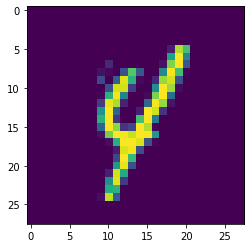

In [ ]:
index = 3457
print('label is %d' % train_y[index])
plt.imshow(train_x[index])
plt.show()

In [ ]:
np.min(train_x[index]), np.max(train_x[index]), np.mean(train_x[index])

(0, 255, 19.855867346938776)

In [37]:
train_x_1 = train_x.reshape(len(train_x), -1)
print(train_x_1.shape)

test_x_1 = test_x.reshape(len(test_x), -1)
print(test_x_1.shape)

(60000, 784)
(10000, 784)


In [ ]:
class DummyClassifier(object):
    def __init__(self):
        self.name = 'Dummy'
    def fit(self, train_x, train_y):
        pass
    def predict(self, test_x):
        return np.random.randint(low=0, high=10, size=len(test_x))
    
    

In [ ]:
classifier = DummyClassifier()
classifier.fit(train_x_1, train_y)
pred = classifier.predict(test_x_1)

In [ ]:
def accuracy(pred, gt):
    return np.sum(pred == gt)/len(gt)

In [ ]:
acc = accuracy(pred, test_y)
print(acc)

0.1101


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(pred, test_y)

0.1101

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
results = []
for k in range(1,10, 2):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_x_1[:2000], train_y[:2000])
    pred = classifier.predict(test_x_1[:100])
    acc = accuracy_score(pred, test_y[:100])
    results.append(acc)
    print(k, acc)

1 0.86
3 0.9
5 0.9
7 0.89
9 0.9


In [ ]:
results = []
for k in range(1,10, 2):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_x_1[:3000], train_y[:3000])
    pred = classifier.predict(test_x_1[:100])
    acc = accuracy_score(pred, test_y[:100])
    results.append(acc)
    print(k, acc)

1 0.89
3 0.94
5 0.93
7 0.9
9 0.9


In [ ]:
results = []
for k in range(1,10, 2):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_x_1[:10000], train_y[:10000])
    pred = classifier.predict(test_x_1[:100])
    acc = accuracy_score(pred, test_y[:100])
    results.append(acc)
    print(k, acc)

1 0.92
3 0.95
5 0.95
7 0.94
9 0.96


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters=20)
km.fit(train_x_1[:10000])


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
for cluster in km.cluster_centers_:
    plt.imshow(cluster.reshape(28,28))
    plt.show()

#### Задача 1

Подобрать оптимальные параметры для KNeighborsClassifier.
В качестве решения необходимо отправить код подбора параметров в этом ноутбуке seminar03_knn.ipynb и параметры лучшего классификатора knn_best_params.pkl

#### Задача 2

Найти 10 эталонов, чтобы качество классификации было максимальным. (Преодолеть 70%)

В качестве решения необходимо отправить код поиска эталонов в этом ноутбуке seminar03_knn.ipynb и файл с 10 эталонами knn_10_best.npy


#### Задача 3*

Сколько эталонов нужно, чтобы преодолеть 90% точность?
Задача не является обязательной, в качестве решения необходимо предоставить код с решением

#### Ноутбук с решением необходимо сдать отправить боту @ml2021sharebot c пометкой seminar03

### Решение задачи 1

In [ ]:
# ваше решение задачи 1
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

knn = KNeighborsClassifier()

k_range = range(1,25, 2)
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options)
knn_gscv = GridSearchCV(knn, param_grid, cv=5, scoring = 'accuracy')
knn_gscv.fit(train_x_1, train_y)

In [ ]:
knn_gscv.best_params_

In [ ]:
knn_gscv.best_score_

In [ ]:
knn_gscv.best_estimator_

In [ ]:
# сохраните параметры лучшего классификатора
with open("knn_best_params.pkl", "wb") as f:
    pickle.dump(knn_gscv.best_params_, f)



### Решение задачи 2

In [ ]:
# ваше решение задачи 2
import numpy as np
from sklearn.cluster import KMeans

d0, = np.where(train_y == 0)
d1, = np.where(train_y == 1)
d2, = np.where(train_y == 2)
d3, = np.where(train_y == 3)
d4, = np.where(train_y == 4)
d5, = np.where(train_y == 5)
d6, = np.where(train_y == 6)
d7, = np.where(train_y == 7)
d8, = np.where(train_y == 8)
d9, = np.where(train_y == 9)
d0test, = np.where(test_y == 0)
d1test, = np.where(test_y == 1)
d2test, = np.where(test_y == 2)
d3test, = np.where(test_y == 3)
d4test, = np.where(test_y == 4)
d5test, = np.where(test_y == 5)
d6test, = np.where(test_y == 6)
d7test, = np.where(test_y == 7)
d8test, = np.where(test_y == 8)
d9test, = np.where(test_y == 9)

d0_ = train_x_1[d0]
d1_ = train_x_1[d1]
d2_ = train_x_1[d2]
d3_ = train_x_1[d3]
d4_ = train_x_1[d4]
d5_ = train_x_1[d5]
d6_ = train_x_1[d6]
d7_ = train_x_1[d7]
d8_ = train_x_1[d8]
d9_ = train_x_1[d9]
d0test_ = test_x_1[d0test]
d1test_ = test_x_1[d1test]
d2test_ = test_x_1[d2test]
d3test_ = test_x_1[d3test]
d4test_ = test_x_1[d4test]
d5test_ = test_x_1[d5test]
d6test_ = test_x_1[d6test]
d7test_ = test_x_1[d7test]
d8test_ = test_x_1[d8test]
d9test_ = test_x_1[d9test]

d0_=np.concatenate((d0_, d0test_), axis=0)
d1_=np.concatenate((d1_, d1test_), axis=0)
d2_=np.concatenate((d2_, d2test_), axis=0)
d3_=np.concatenate((d3_, d3test_), axis=0)
d4_=np.concatenate((d4_, d4test_), axis=0)
d5_=np.concatenate((d5_, d5test_), axis=0)
d6_=np.concatenate((d6_, d6test_), axis=0)
d7_=np.concatenate((d7_, d7test_), axis=0)
d8_=np.concatenate((d8_, d8test_), axis=0)
d9_=np.concatenate((d9_, d9test_), axis=0)

new_train_x = np.zeros([10,784])
new_train_y = np.array([])

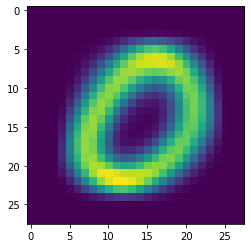

In [ ]:
km = KMeans(n_clusters=1)
km.fit(d0_)
new_train_x[:1,:]=km.cluster_centers_
new_train_y=np.append(new_train_y,0)
for cluster in km.cluster_centers_:
    plt.imshow(cluster.reshape(28,28))
    plt.show()

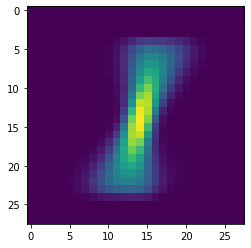

In [ ]:
km = KMeans(n_clusters=1)
km.fit(d1_)
new_train_x[1:2,:]=km.cluster_centers_
new_train_y=np.append(new_train_y,1)
for cluster in km.cluster_centers_:
    plt.imshow(cluster.reshape(28,28))
    plt.show()

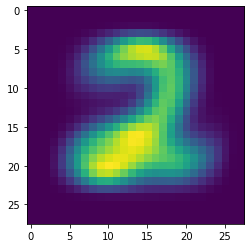

In [ ]:
km = KMeans(n_clusters=1)
km.fit(d2_)
new_train_x[2:3,:]=km.cluster_centers_
new_train_y=np.append(new_train_y,2)
for cluster in km.cluster_centers_:
    plt.imshow(cluster.reshape(28,28))
    plt.show()

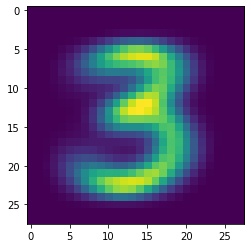

In [ ]:
km = KMeans(n_clusters=1)
km.fit(d3_)
new_train_x[3:4,:]=km.cluster_centers_
new_train_y=np.append(new_train_y,3)
for cluster in km.cluster_centers_:
    plt.imshow(cluster.reshape(28,28))
    plt.show()

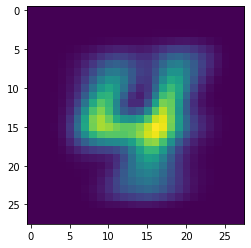

In [ ]:
km = KMeans(n_clusters=1)
km.fit(d4_)
new_train_x[4:5,:]=km.cluster_centers_
new_train_y=np.append(new_train_y,4)
for cluster in km.cluster_centers_:
    plt.imshow(cluster.reshape(28,28))
    plt.show()

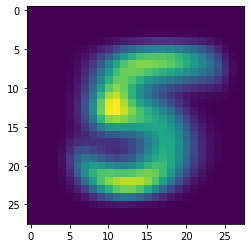

In [ ]:
km = KMeans(n_clusters=1)
km.fit(d5_)
new_train_x[5:6,:]=km.cluster_centers_
new_train_y=np.append(new_train_y,5)
for cluster in km.cluster_centers_:
    plt.imshow(cluster.reshape(28,28))
    plt.show()

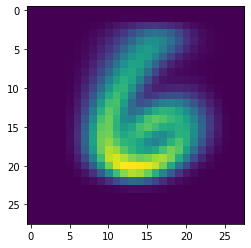

In [ ]:
km = KMeans(n_clusters=1)
km.fit(d6_)
new_train_x[6:7,:]=km.cluster_centers_
new_train_y=np.append(new_train_y,6)
for cluster in km.cluster_centers_:
    plt.imshow(cluster.reshape(28,28))
    plt.show()

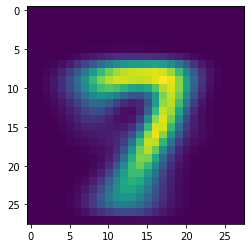

In [ ]:
km = KMeans(n_clusters=1)
km.fit(d7_)
new_train_x[7:8,:]=km.cluster_centers_
new_train_y=np.append(new_train_y,7)
for cluster in km.cluster_centers_:
    plt.imshow(cluster.reshape(28,28))
    plt.show()

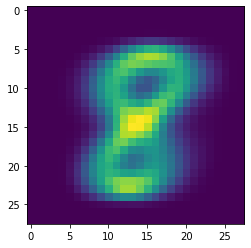

In [ ]:
km = KMeans(n_clusters=1)
km.fit(d8_)
new_train_x[8:9,:]=km.cluster_centers_
new_train_y=np.append(new_train_y,8)
for cluster in km.cluster_centers_:
    plt.imshow(cluster.reshape(28,28))
    plt.show()

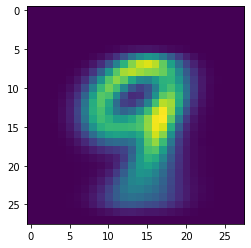

In [ ]:
km = KMeans(n_clusters=1)
km.fit(d9_)
new_train_x[9:,:]=km.cluster_centers_
new_train_y=np.append(new_train_y,9)
for cluster in km.cluster_centers_:
    plt.imshow(cluster.reshape(28,28))
    plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

best_params = {'neighbors':0, 'weights':'none'}
acc1=0

k_range = range(1,10)
weight_options = ["uniform", "distance"]
for i in k_range:
  for j in weight_options:
    classifier = KNeighborsClassifier(n_neighbors=i,weights=j)
    classifier.fit(new_train_x, new_train_y)
    pred = classifier.predict(test_x_1)
    acc = accuracy_score(pred, test_y)
    print(acc)
    if acc > acc1:
      acc1 = acc
      best_params["neighbors"]=i
      best_params["weights"]=j

0.821
0.821
0.5768
0.821
0.4416
0.821
0.3641
0.821
0.3213
0.821
0.2782
0.821
0.2347
0.821
0.2199
0.821
0.2102
0.821


In [ ]:
best_params

{'neighbors': 1, 'weights': 'uniform'}

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=best_params['neighbors'], weights=best_params['weights'])
classifier.fit(new_train_x, new_train_y)
pred = classifier.predict(test_x_1)
acc = accuracy_score(pred, test_y)
print(acc)

0.821


In [ ]:
np.save('knn_10_best', new_train_x)

### Решение задачи 3

In [60]:
# ваше решение задачи 3
#Ответ: 50 и более эталонов для достижения 90% точности
from sklearn.cluster import KMeans

d0, = np.where(train_y == 0)
d1, = np.where(train_y == 1)
d2, = np.where(train_y == 2)
d3, = np.where(train_y == 3)
d4, = np.where(train_y == 4)
d5, = np.where(train_y == 5)
d6, = np.where(train_y == 6)
d7, = np.where(train_y == 7)
d8, = np.where(train_y == 8)
d9, = np.where(train_y == 9)
d0test, = np.where(test_y == 0)
d1test, = np.where(test_y == 1)
d2test, = np.where(test_y == 2)
d3test, = np.where(test_y == 3)
d4test, = np.where(test_y == 4)
d5test, = np.where(test_y == 5)
d6test, = np.where(test_y == 6)
d7test, = np.where(test_y == 7)
d8test, = np.where(test_y == 8)
d9test, = np.where(test_y == 9)

d0_ = train_x_1[d0]
d1_ = train_x_1[d1]
d2_ = train_x_1[d2]
d3_ = train_x_1[d3]
d4_ = train_x_1[d4]
d5_ = train_x_1[d5]
d6_ = train_x_1[d6]
d7_ = train_x_1[d7]
d8_ = train_x_1[d8]
d9_ = train_x_1[d9]
d0test_ = test_x_1[d0test]
d1test_ = test_x_1[d1test]
d2test_ = test_x_1[d2test]
d3test_ = test_x_1[d3test]
d4test_ = test_x_1[d4test]
d5test_ = test_x_1[d5test]
d6test_ = test_x_1[d6test]
d7test_ = test_x_1[d7test]
d8test_ = test_x_1[d8test]
d9test_ = test_x_1[d9test]

d0_=np.concatenate((d0_, d0test_), axis=0)
d1_=np.concatenate((d1_, d1test_), axis=0)
d2_=np.concatenate((d2_, d2test_), axis=0)
d3_=np.concatenate((d3_, d3test_), axis=0)
d4_=np.concatenate((d4_, d4test_), axis=0)
d5_=np.concatenate((d5_, d5test_), axis=0)
d6_=np.concatenate((d6_, d6test_), axis=0)
d7_=np.concatenate((d7_, d7test_), axis=0)
d8_=np.concatenate((d8_, d8test_), axis=0)
d9_=np.concatenate((d9_, d9test_), axis=0)

all_data=[d0_,d1_,d2_,d3_,d4_,d5_,d6_,d7_,d8_,d9_]

In [39]:
print(d0_.shape,d1_.shape,d2_.shape,d3_.shape,d4_.shape,d5_.shape,d6_.shape,d7_.shape,d8_.shape,d9_.shape)

(6903, 784) (7877, 784) (6990, 784) (7141, 784) (6824, 784) (6313, 784) (6876, 784) (7293, 784) (6825, 784) (6958, 784)


--------------------------- 2 ---------------------------
(20, 784) (20,) [0. 0. 1. 1. 2. 2. 3. 3. 4. 4. 5. 5. 6. 6. 7. 7. 8. 8. 9. 9.]


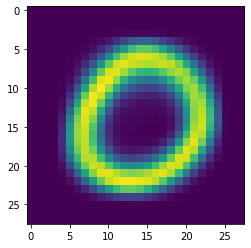

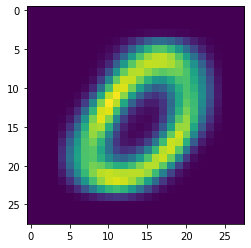

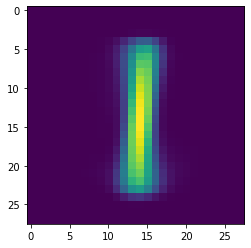

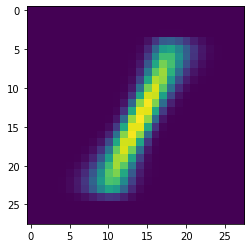

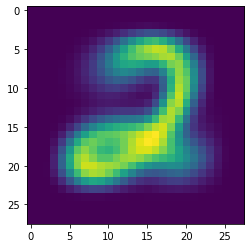

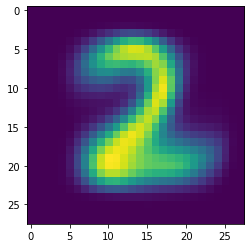

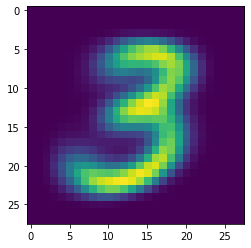

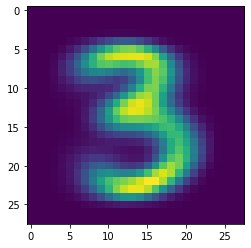

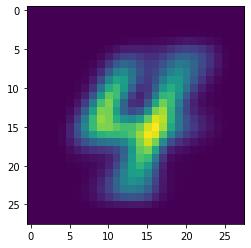

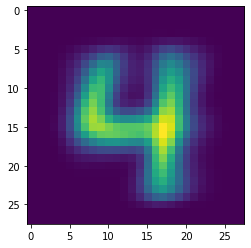

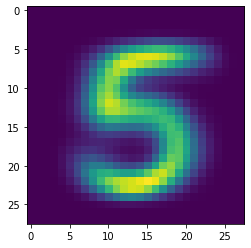

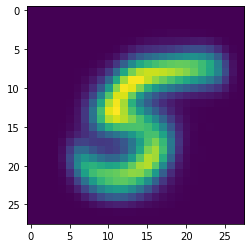

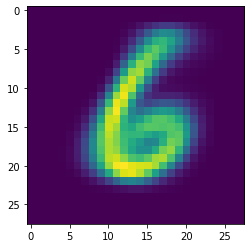

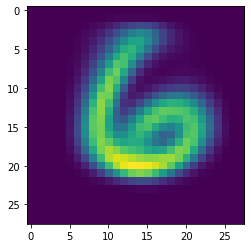

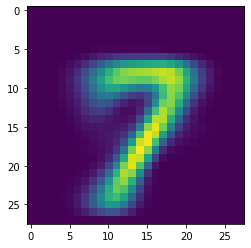

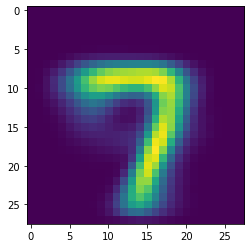

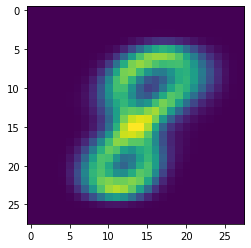

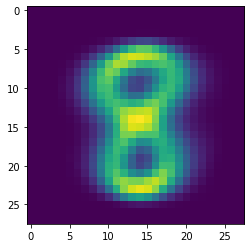

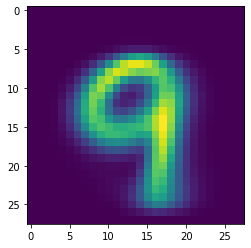

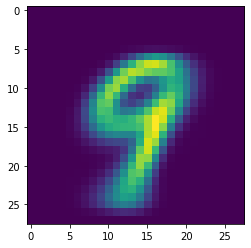

0.8621
0.8621
0.6662
0.8621
0.6176
0.8389
0.6174
0.7901
0.5979
0.7637
0.5619
0.7468
0.5124
0.7427
0.4774
0.7534
0.439
0.7683
0.4032
0.7811
{'neighbors': 1, 'weights': 'uniform'}
--------------------------- 3 ---------------------------
(30, 784) (30,) [0. 0. 0. 1. 1. 1. 2. 2. 2. 3. 3. 3. 4. 4. 4. 5. 5. 5. 6. 6. 6. 7. 7. 7.
 8. 8. 8. 9. 9. 9.]


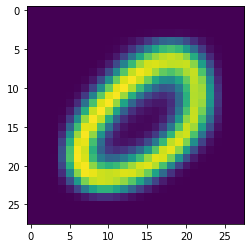

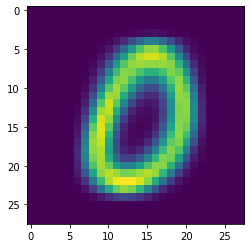

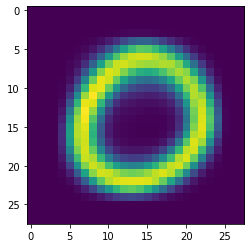

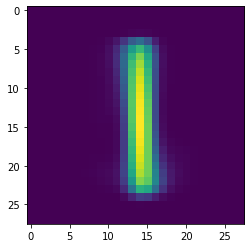

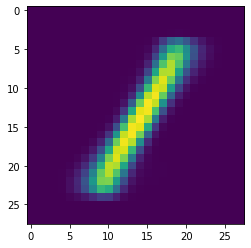

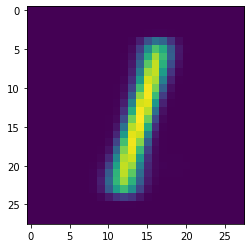

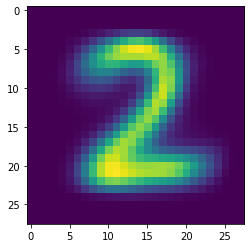

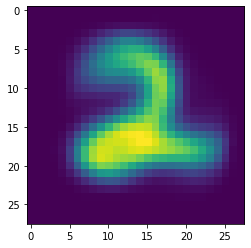

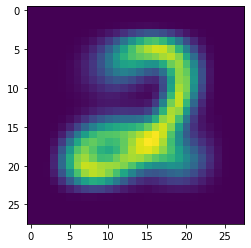

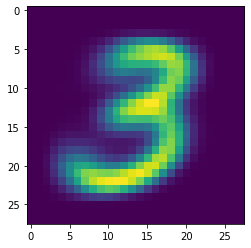

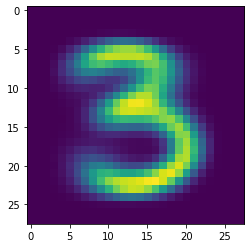

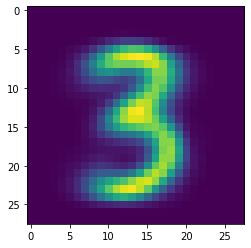

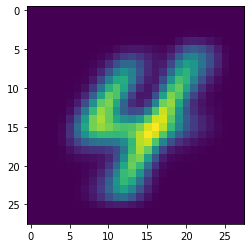

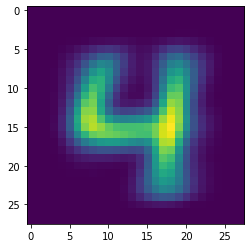

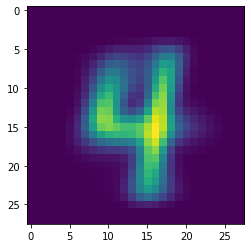

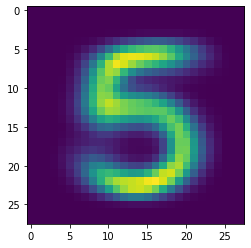

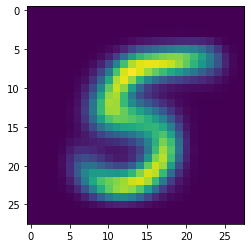

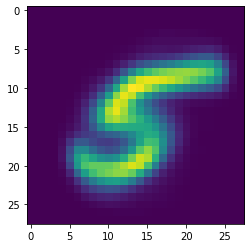

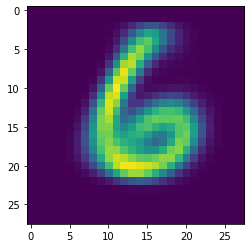

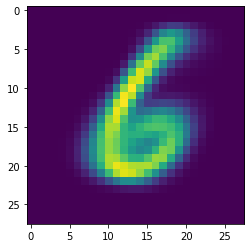

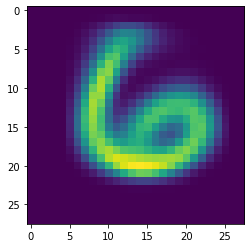

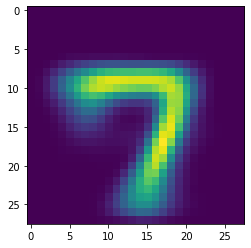

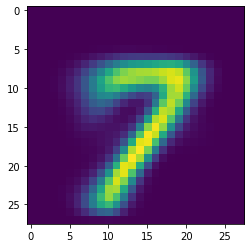

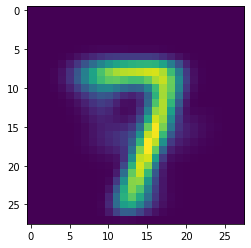

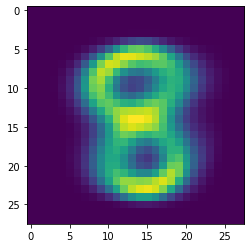

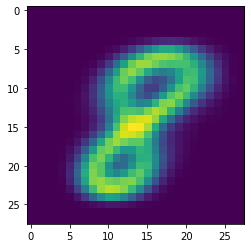

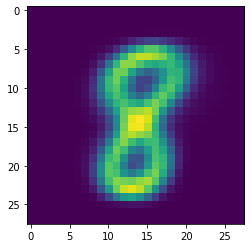

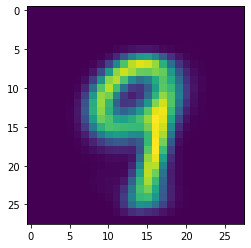

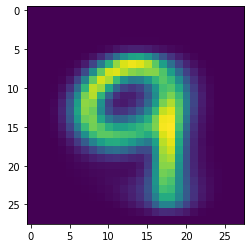

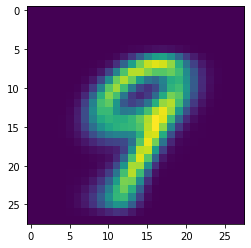

0.8838
0.8838
0.7283
0.8838
0.7153
0.8508
0.711
0.8239
0.6658
0.8039
0.6342
0.7874
0.6139
0.7719
0.596
0.7655
0.585
0.7596
0.5745
0.7531
{'neighbors': 1, 'weights': 'uniform'}
--------------------------- 4 ---------------------------
(40, 784) (40,) [0. 0. 0. 0. 1. 1. 1. 1. 2. 2. 2. 2. 3. 3. 3. 3. 4. 4. 4. 4. 5. 5. 5. 5.
 6. 6. 6. 6. 7. 7. 7. 7. 8. 8. 8. 8. 9. 9. 9. 9.]


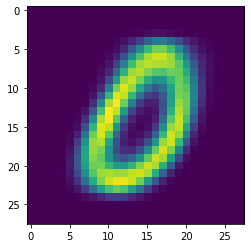

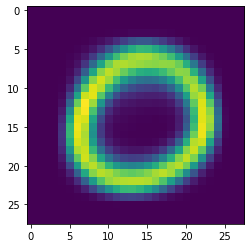

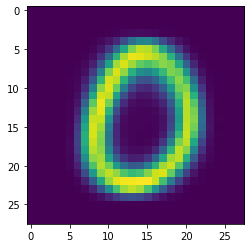

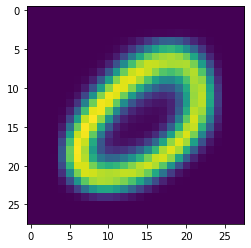

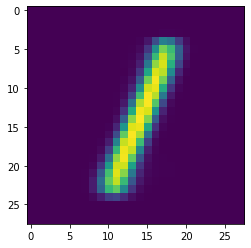

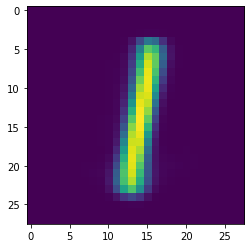

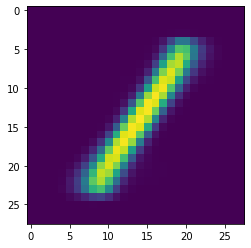

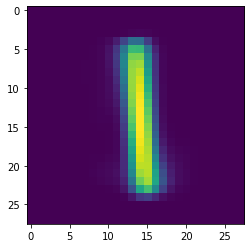

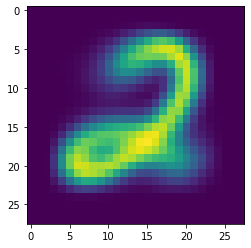

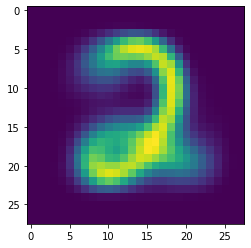

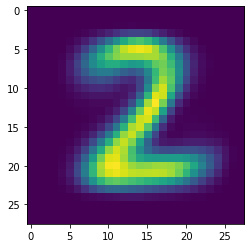

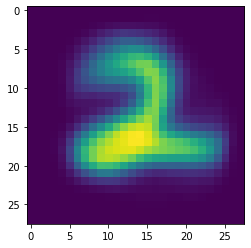

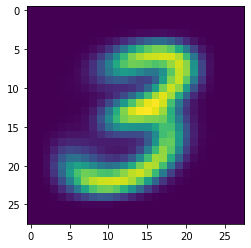

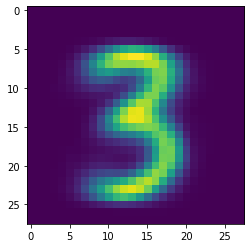

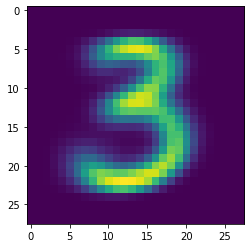

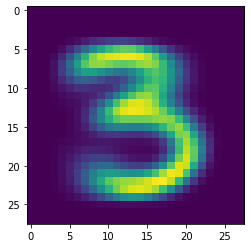

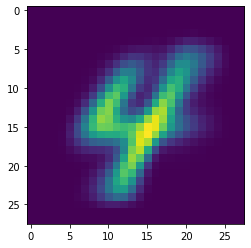

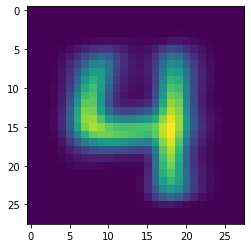

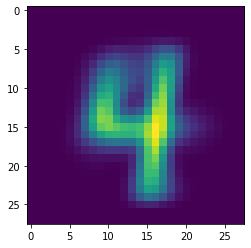

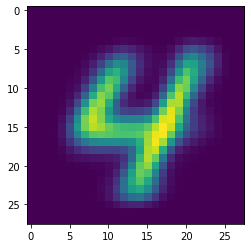

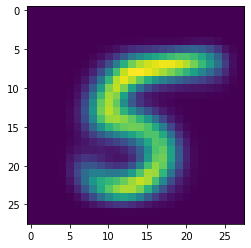

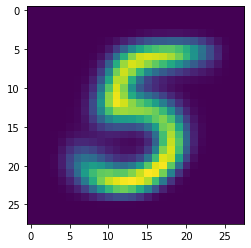

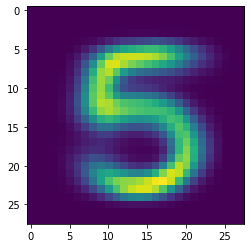

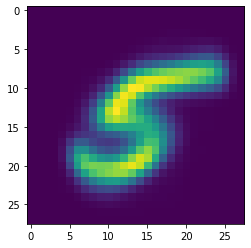

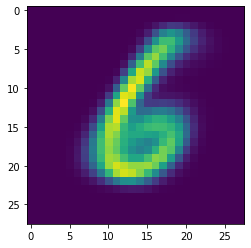

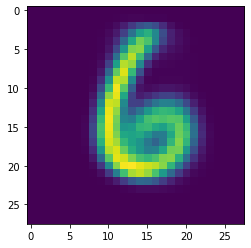

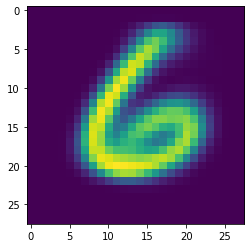

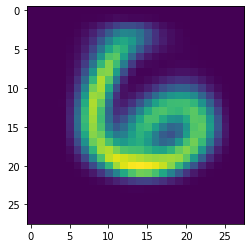

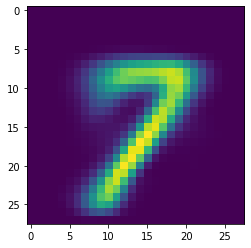

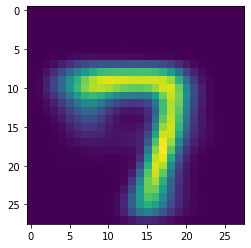

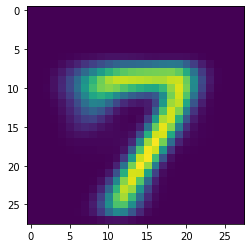

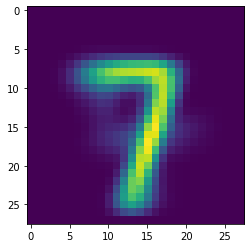

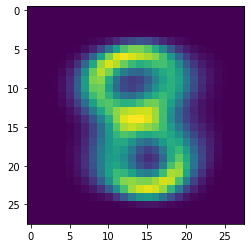

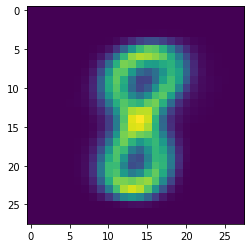

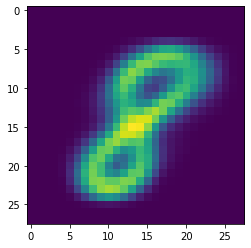

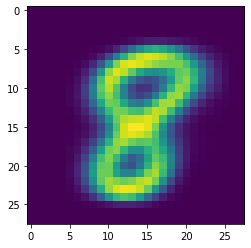

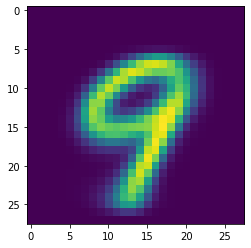

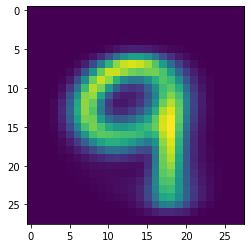

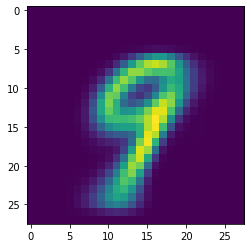

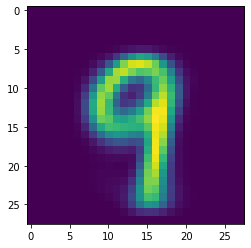

0.8978
0.8978
0.7614
0.8978
0.7507
0.8678
0.7542
0.8449
0.7293
0.8281
0.7185
0.8085
0.7017
0.7988
0.6828
0.7919
0.6569
0.779
0.6402
0.7658
{'neighbors': 1, 'weights': 'uniform'}
--------------------------- 5 ---------------------------
(50, 784) (50,) [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 4. 4. 4. 4.
 4. 5. 5. 5. 5. 5. 6. 6. 6. 6. 6. 7. 7. 7. 7. 7. 8. 8. 8. 8. 8. 9. 9. 9.
 9. 9.]


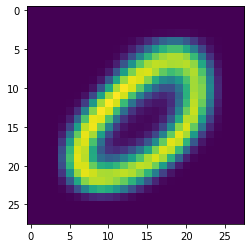

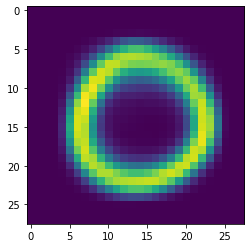

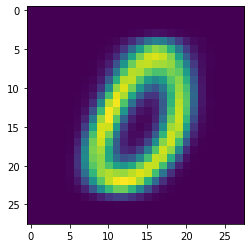

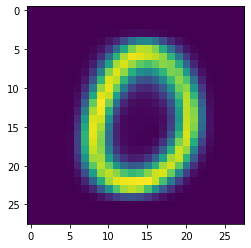

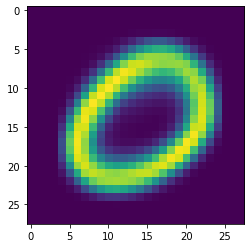

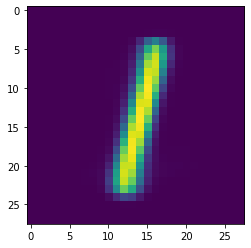

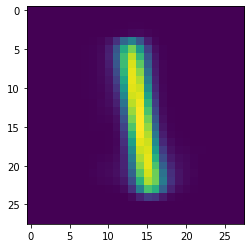

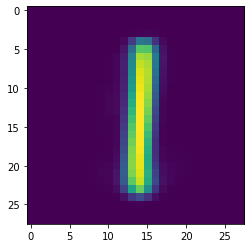

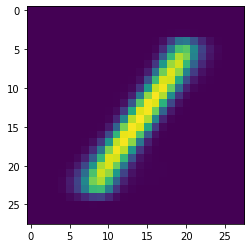

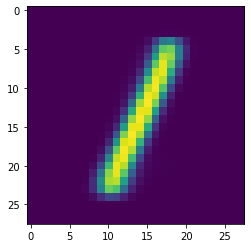

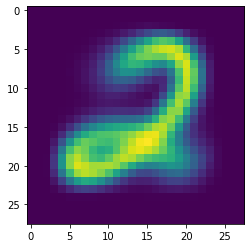

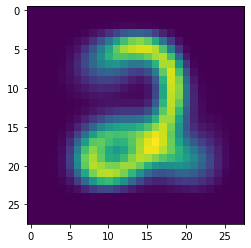

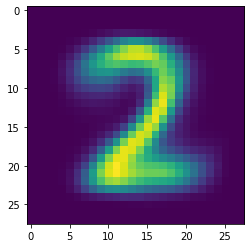

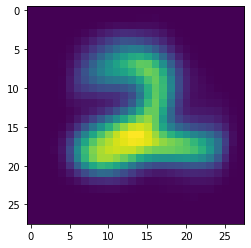

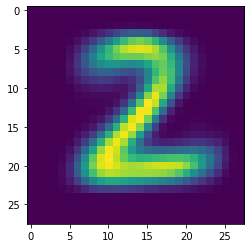

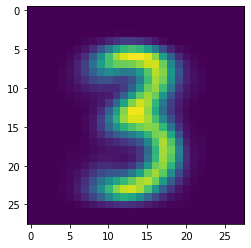

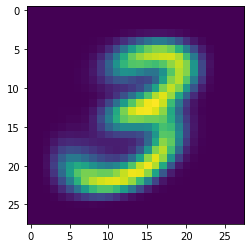

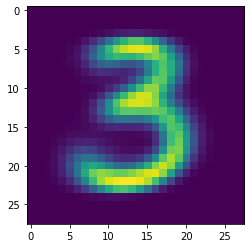

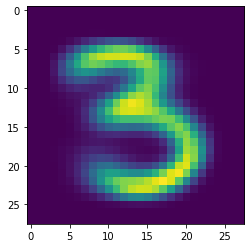

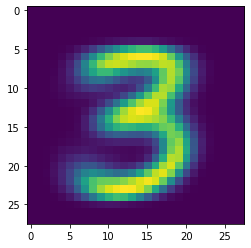

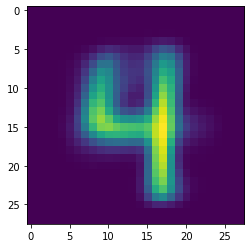

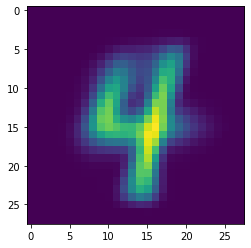

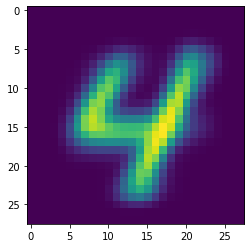

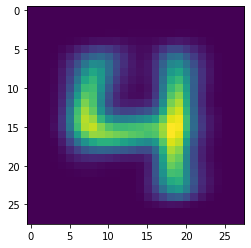

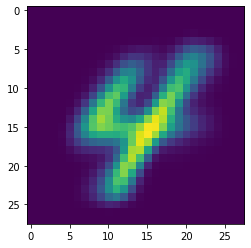

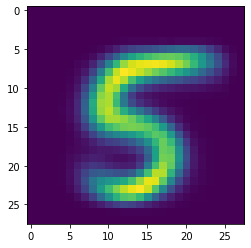

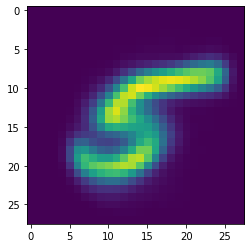

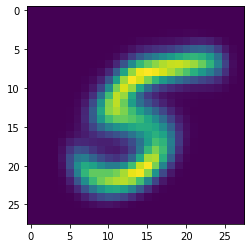

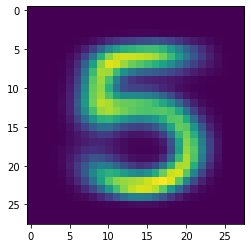

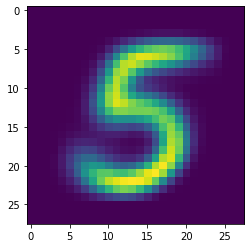

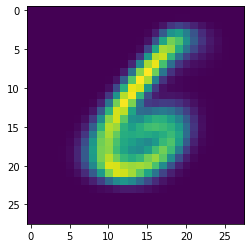

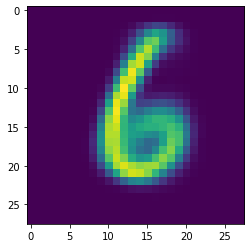

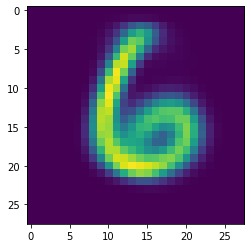

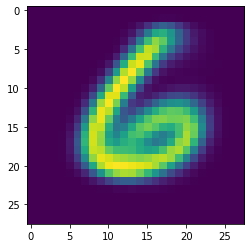

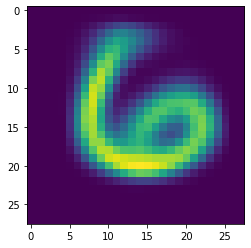

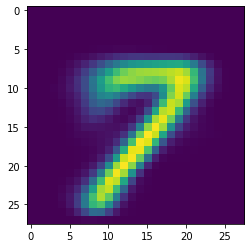

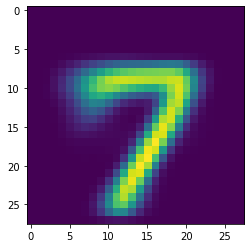

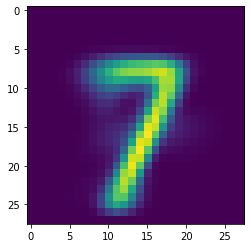

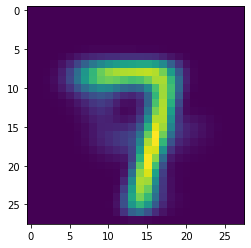

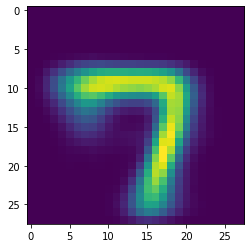

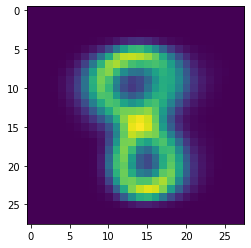

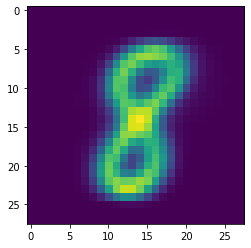

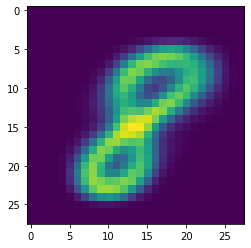

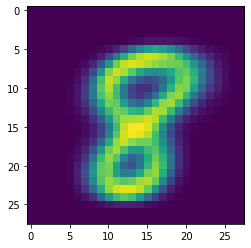

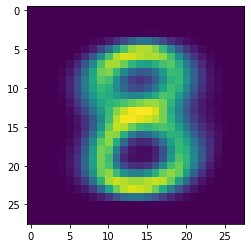

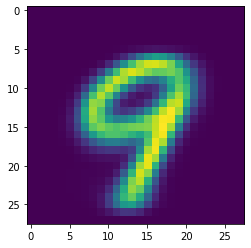

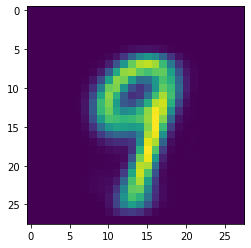

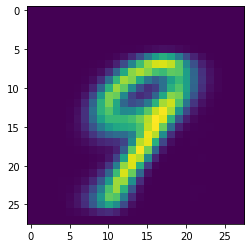

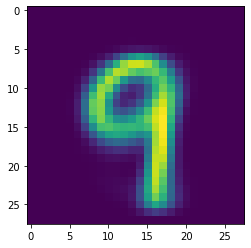

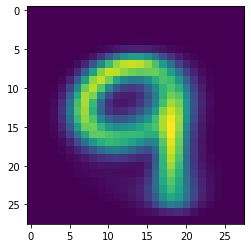

0.9054
0.9054
0.7851
0.9054
0.794
0.8735
0.796
0.8563
0.7676
0.8489
0.7525
0.8362
0.7363
0.8317
0.7129
0.821
0.6968
0.8039
0.6825
0.7867
{'neighbors': 1, 'weights': 'uniform'}
--------------------------- 6 ---------------------------
(60, 784) (60,) [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3.
 4. 4. 4. 4. 4. 4. 5. 5. 5. 5. 5. 5. 6. 6. 6. 6. 6. 6. 7. 7. 7. 7. 7. 7.
 8. 8. 8. 8. 8. 8. 9. 9. 9. 9. 9. 9.]


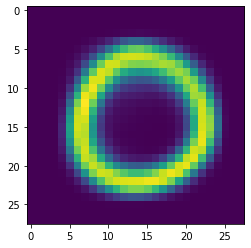

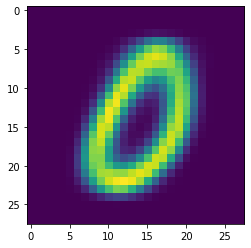

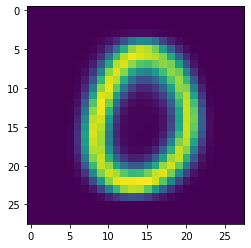

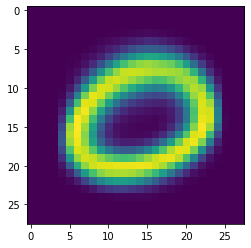

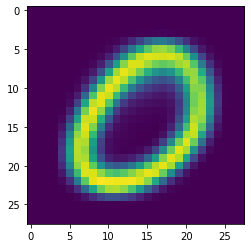

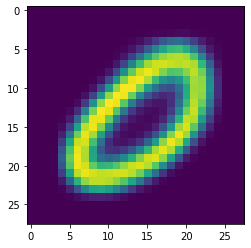

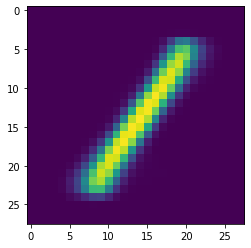

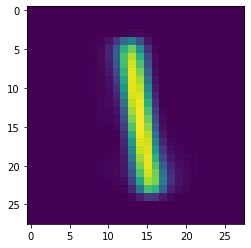

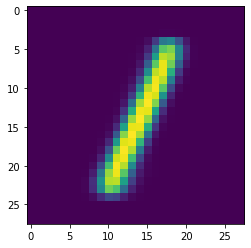

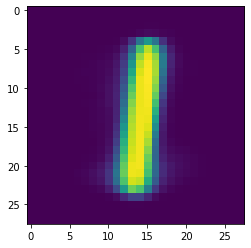

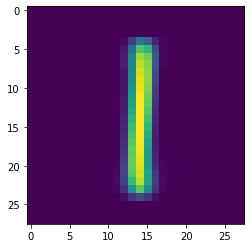

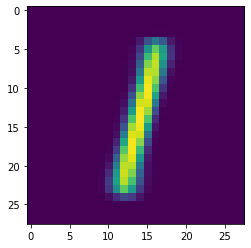

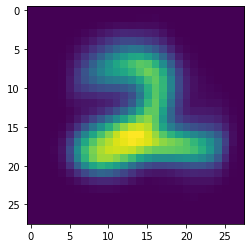

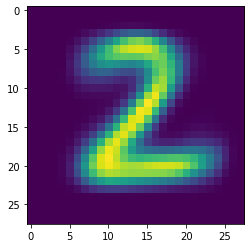

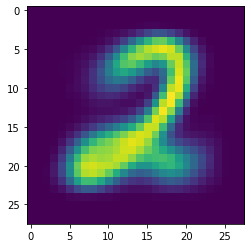

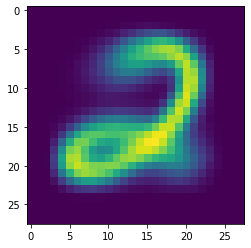

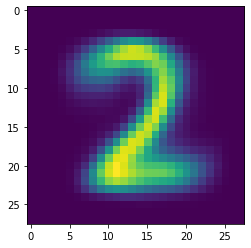

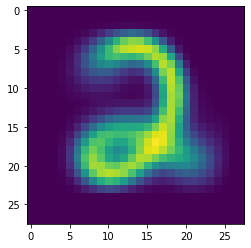

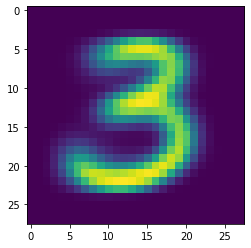

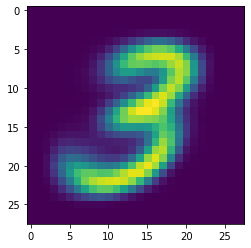

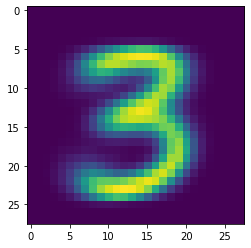

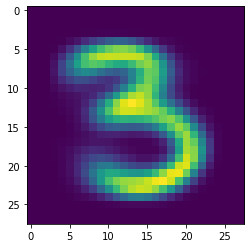

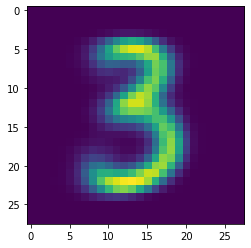

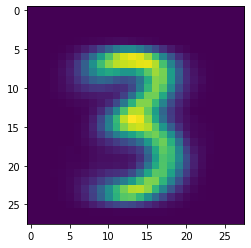

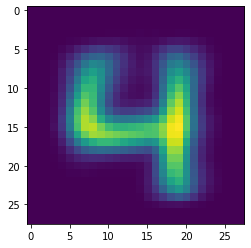

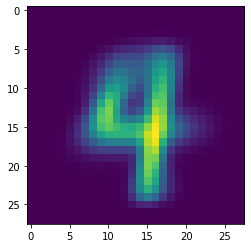

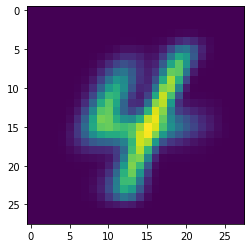

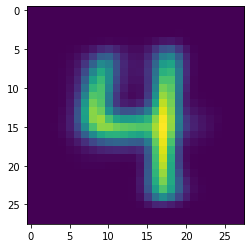

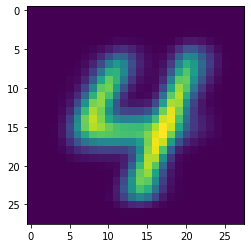

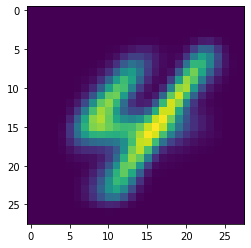

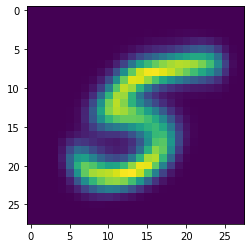

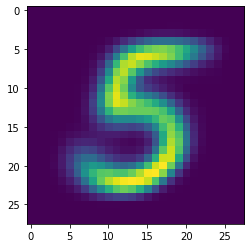

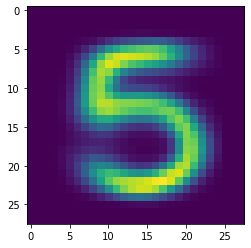

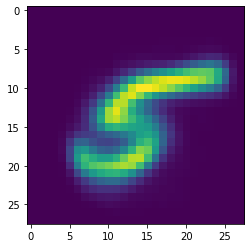

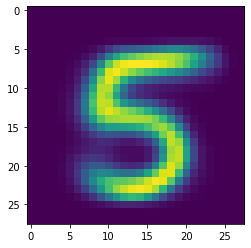

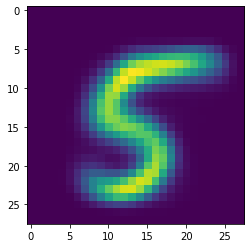

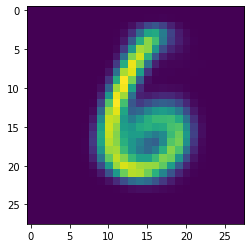

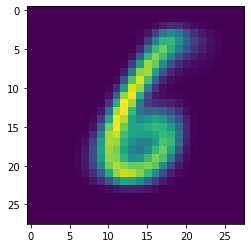

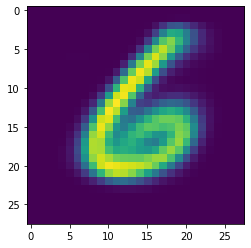

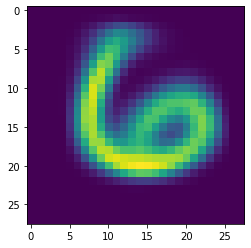

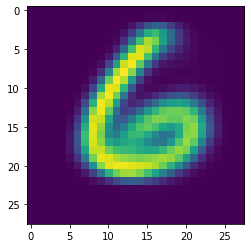

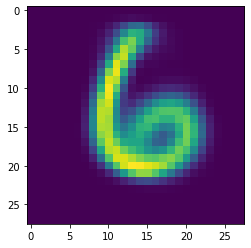

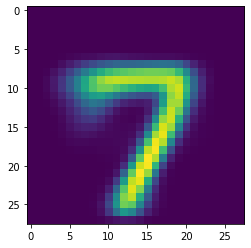

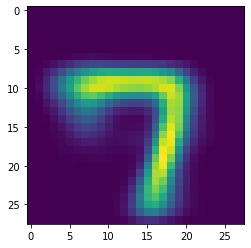

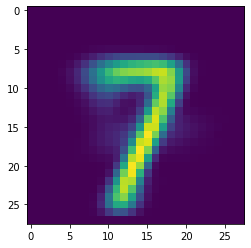

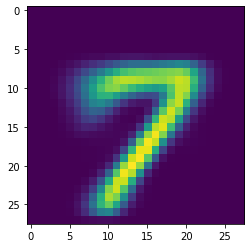

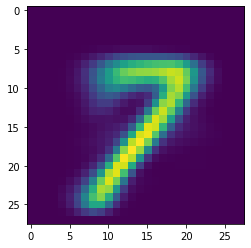

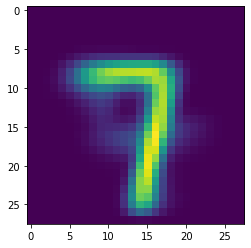

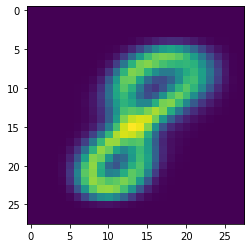

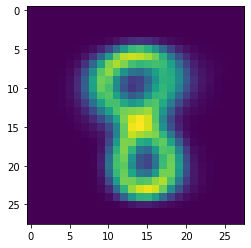

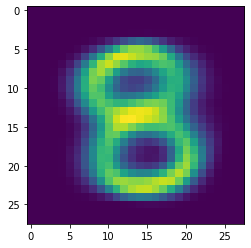

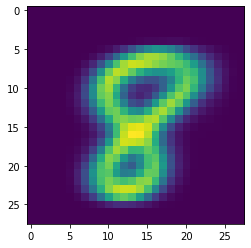

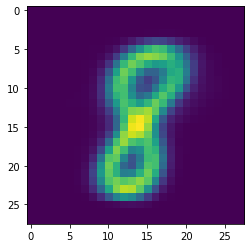

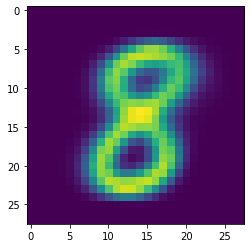

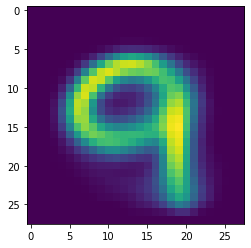

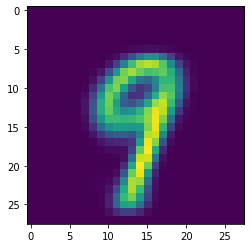

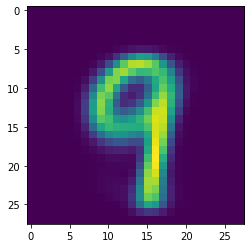

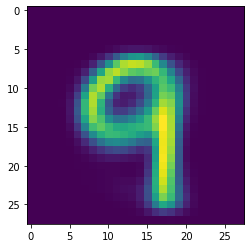

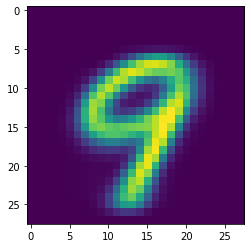

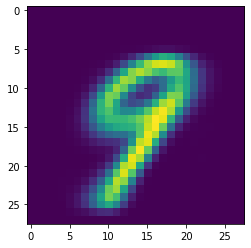

0.9134
0.9134
0.8131
0.9134
0.8212
0.8859
0.8065
0.8722
0.7879
0.8582
0.7785
0.8504
0.7603
0.8385
0.7477
0.8279
0.7307
0.8133
0.7182
0.8044
{'neighbors': 1, 'weights': 'uniform'}
--------------------------- 7 ---------------------------
(70, 784) (70,) [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3.
 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 5. 5. 5. 5. 5. 5. 5. 6. 6. 6. 6. 6. 6.
 6. 7. 7. 7. 7. 7. 7. 7. 8. 8. 8. 8. 8. 8. 8. 9. 9. 9. 9. 9. 9. 9.]


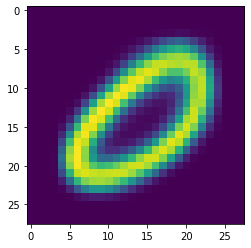

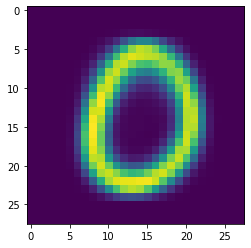

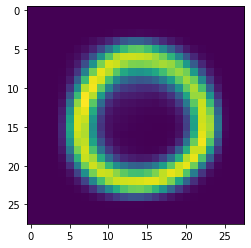

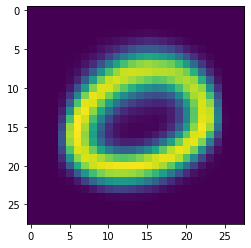

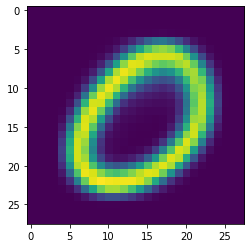

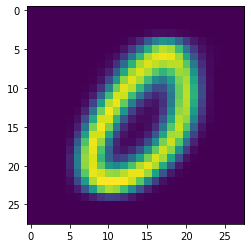

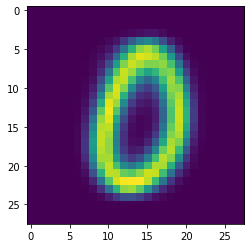

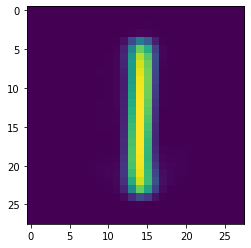

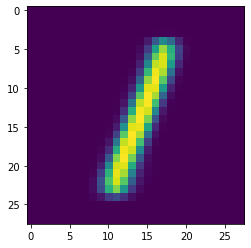

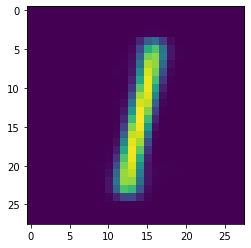

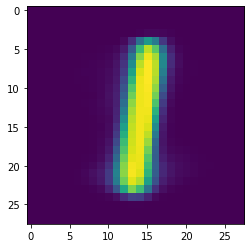

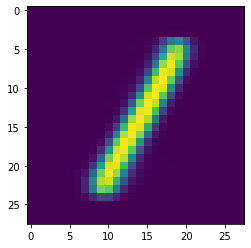

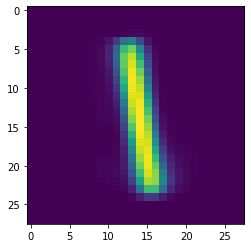

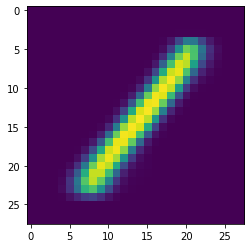

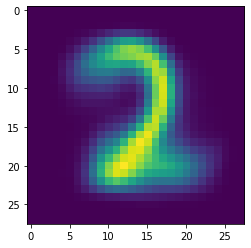

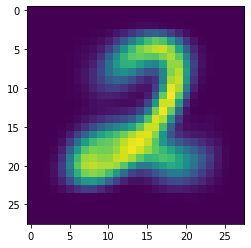

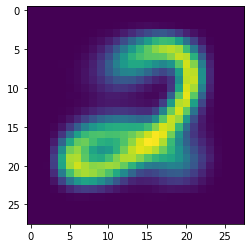

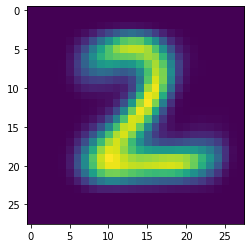

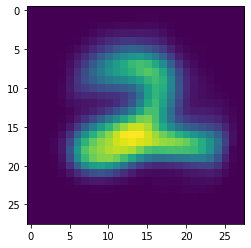

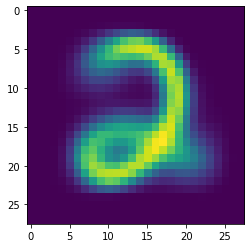

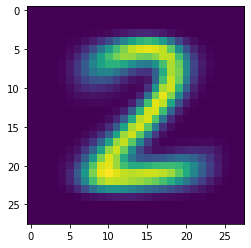

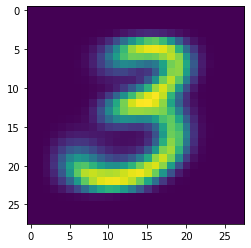

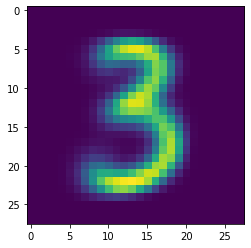

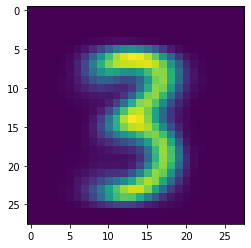

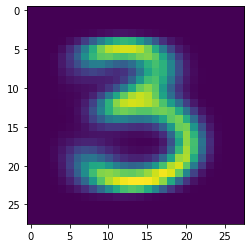

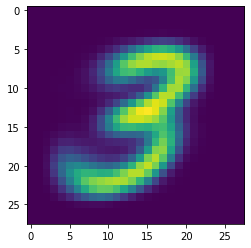

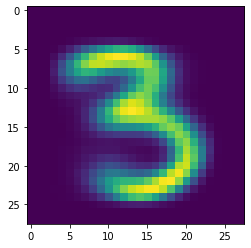

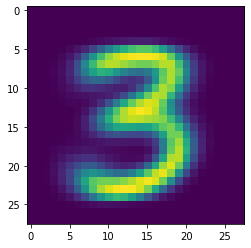

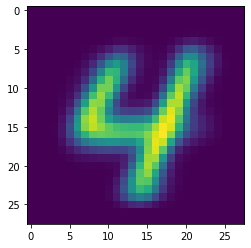

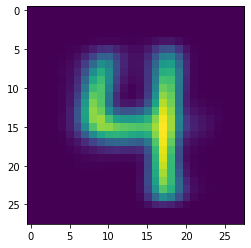

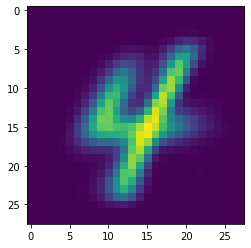

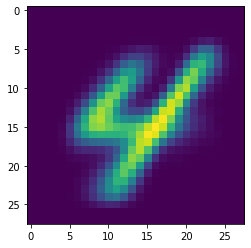

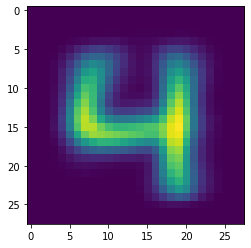

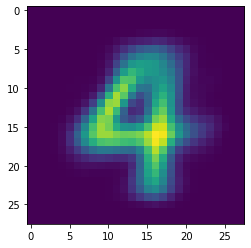

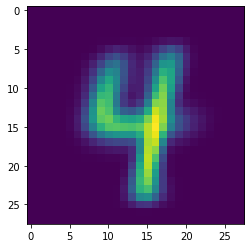

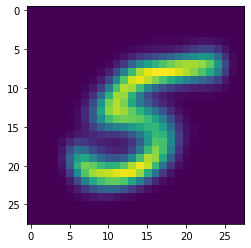

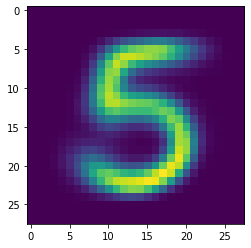

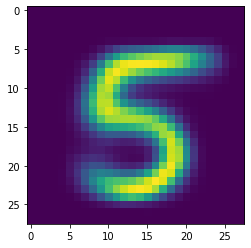

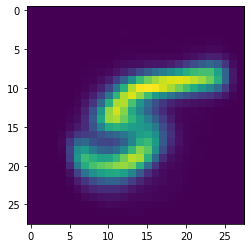

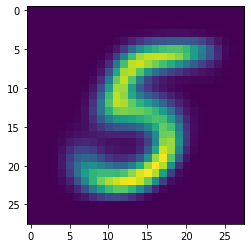

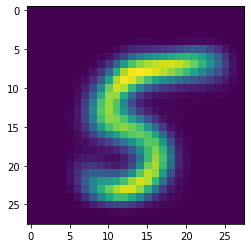

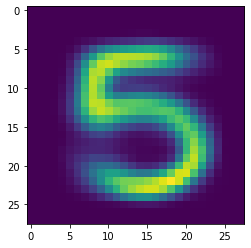

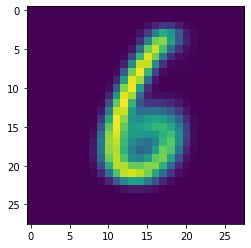

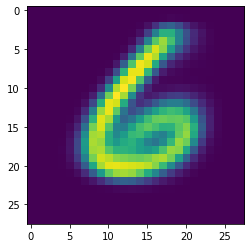

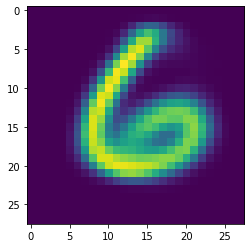

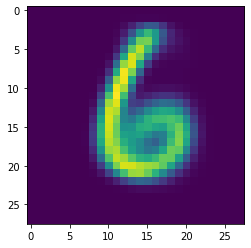

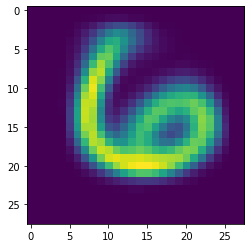

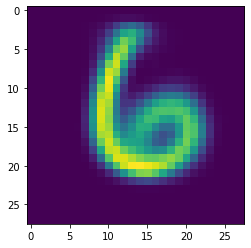

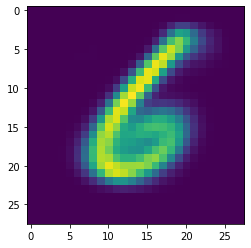

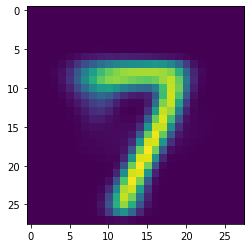

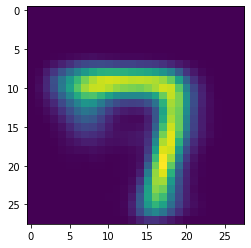

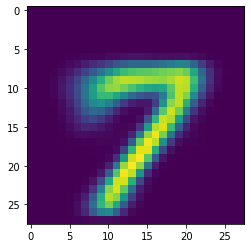

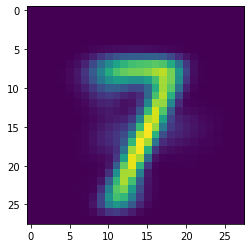

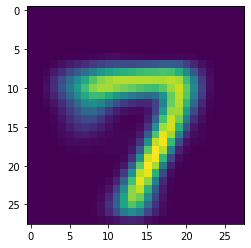

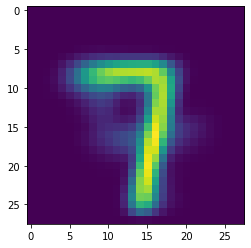

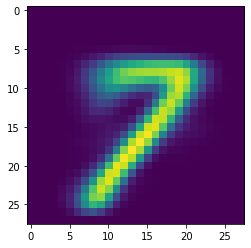

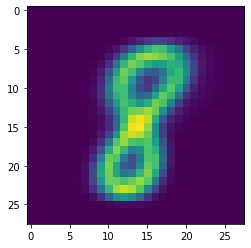

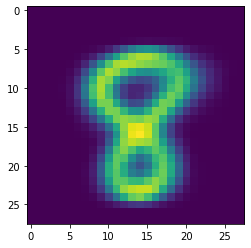

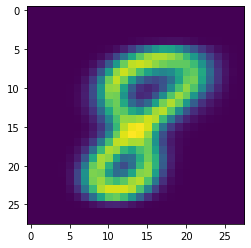

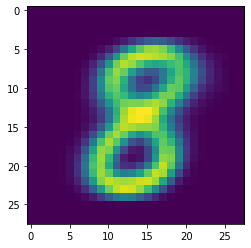

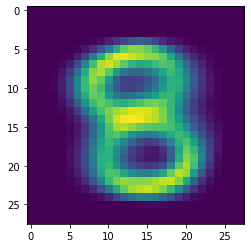

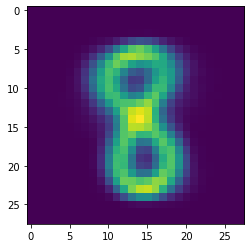

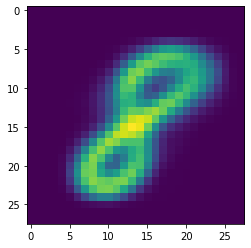

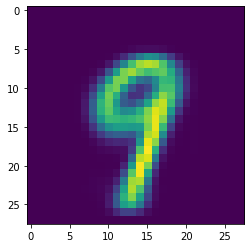

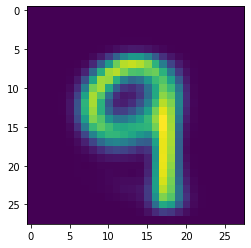

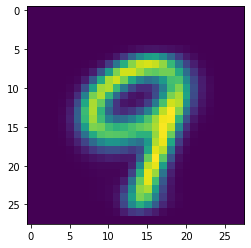

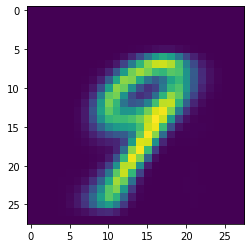

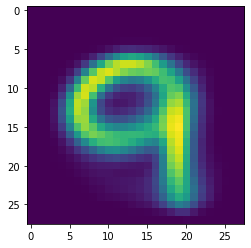

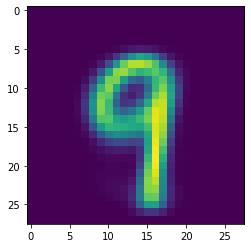

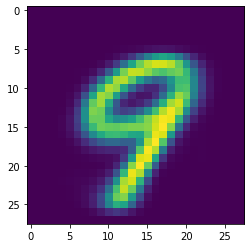

0.9174
0.9174
0.8322
0.9174
0.845
0.8924
0.836
0.8882
0.8142
0.8737
0.8015
0.8643
0.7864
0.8538
0.7694
0.8429
0.7501
0.8299
0.7411
0.8194
{'neighbors': 1, 'weights': 'uniform'}
--------------------------- 8 ---------------------------
(80, 784) (80,) [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2.
 3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 5. 5. 5. 5. 5. 5. 5. 5.
 6. 6. 6. 6. 6. 6. 6. 6. 7. 7. 7. 7. 7. 7. 7. 7. 8. 8. 8. 8. 8. 8. 8. 8.
 9. 9. 9. 9. 9. 9. 9. 9.]


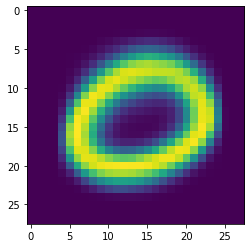

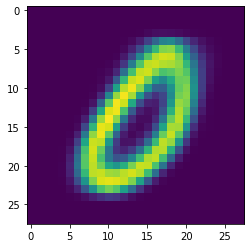

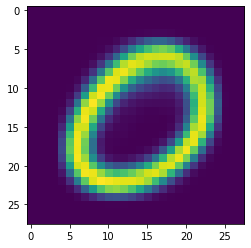

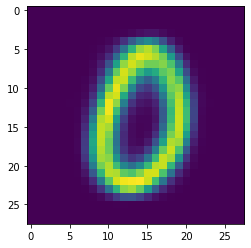

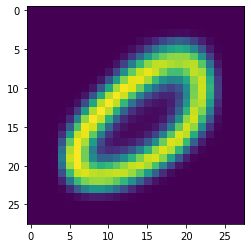

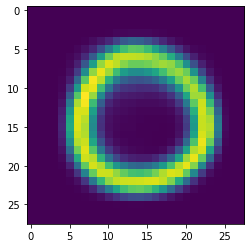

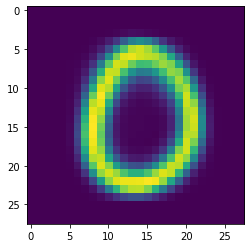

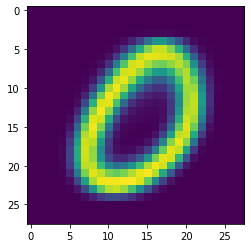

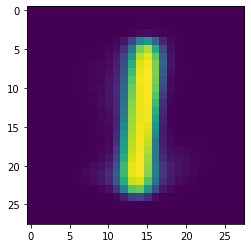

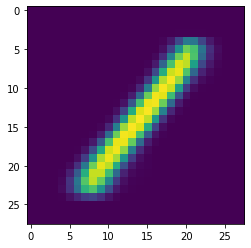

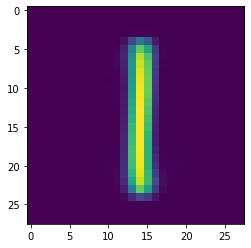

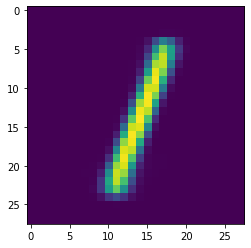

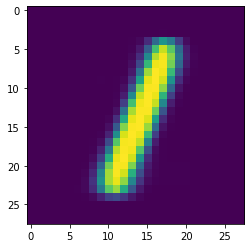

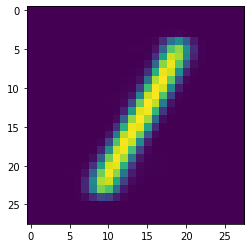

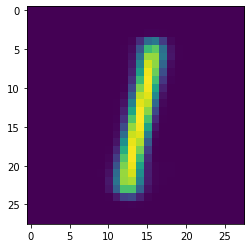

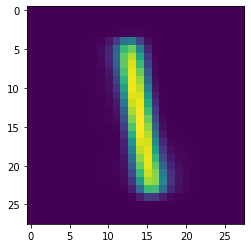

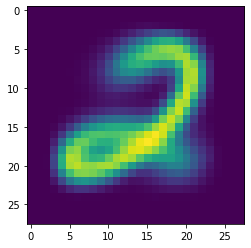

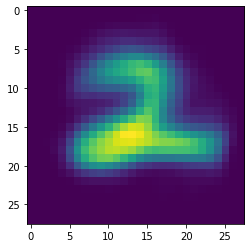

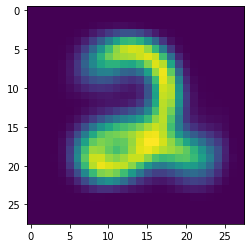

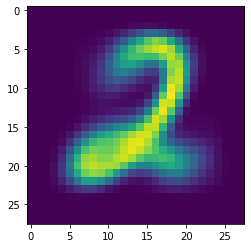

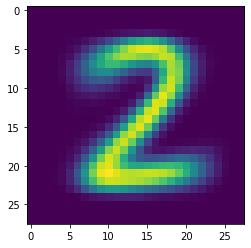

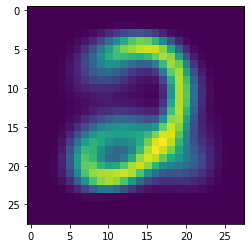

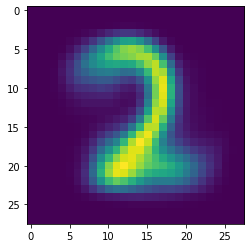

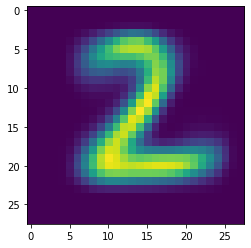

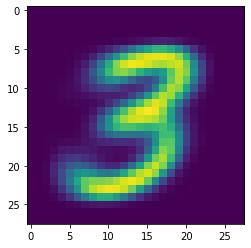

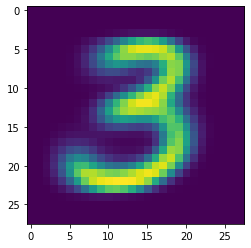

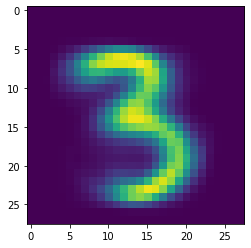

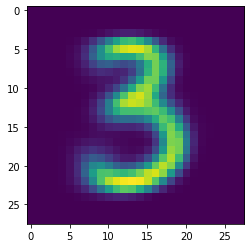

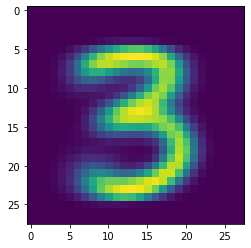

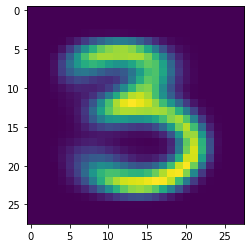

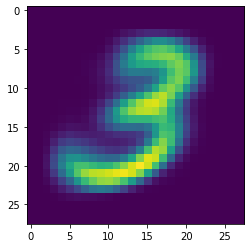

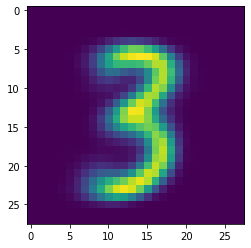

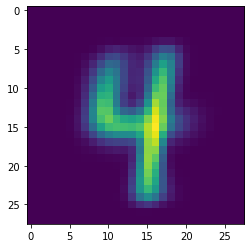

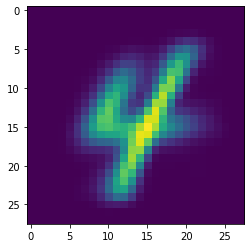

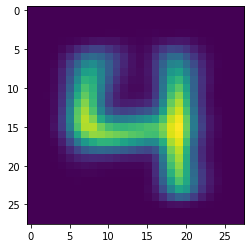

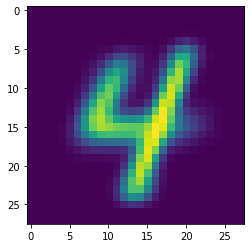

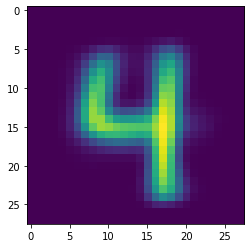

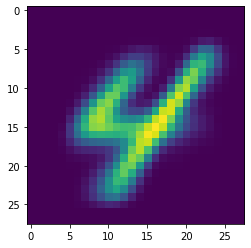

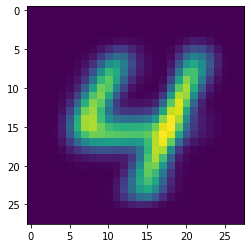

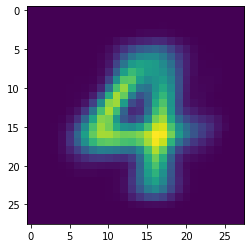

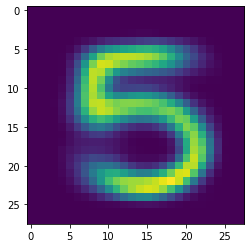

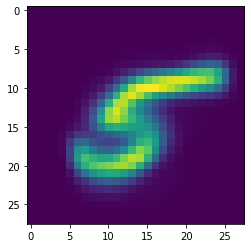

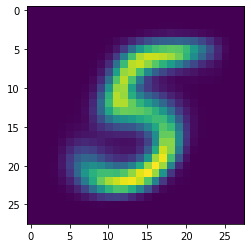

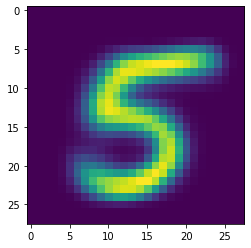

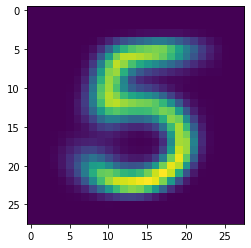

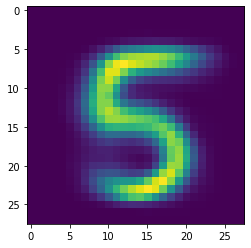

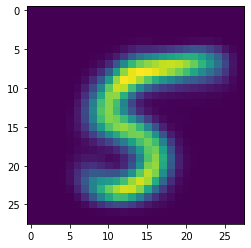

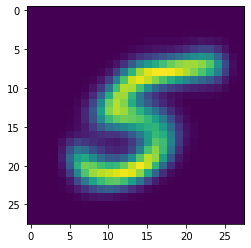

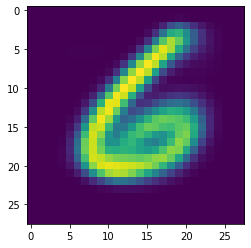

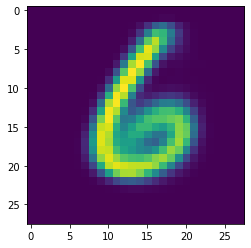

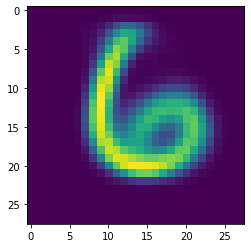

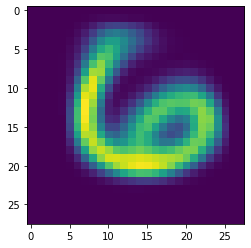

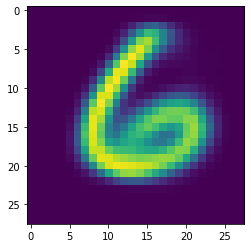

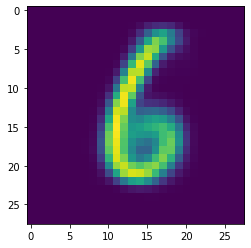

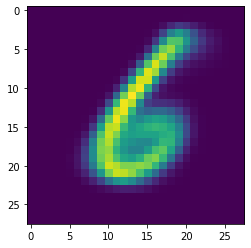

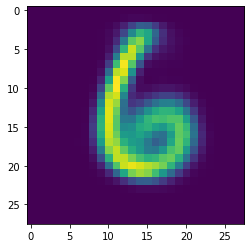

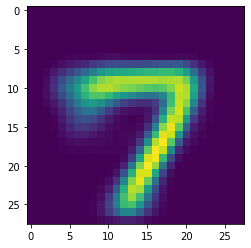

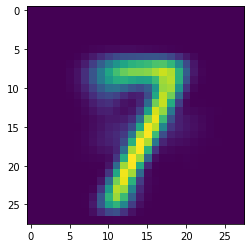

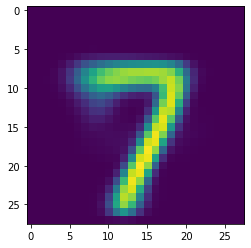

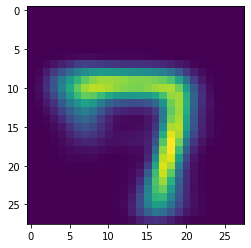

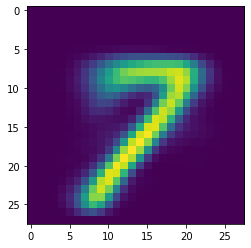

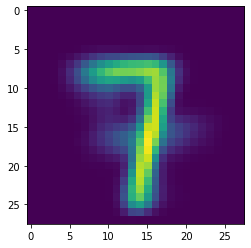

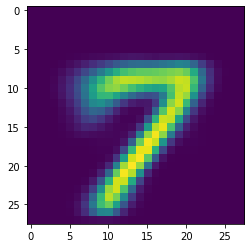

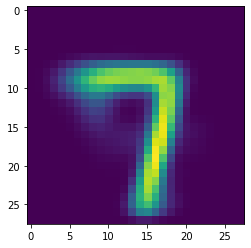

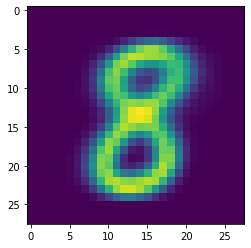

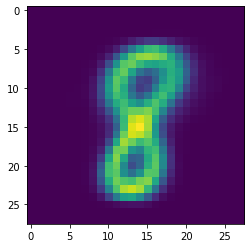

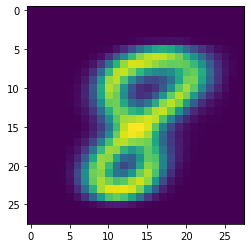

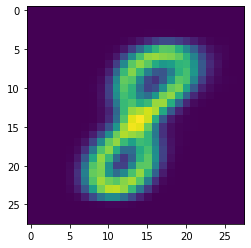

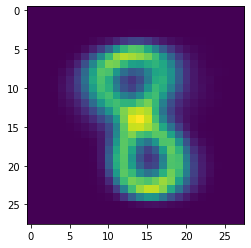

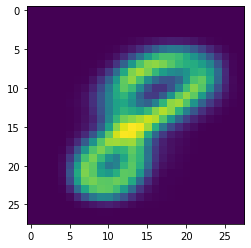

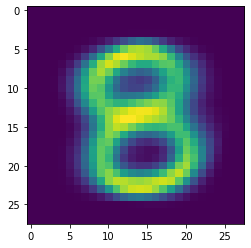

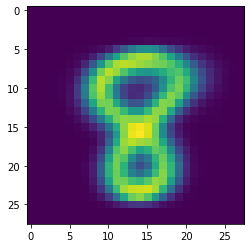

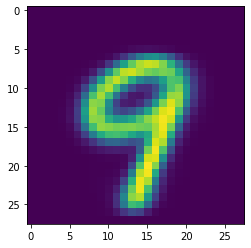

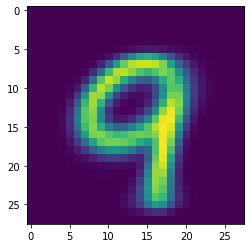

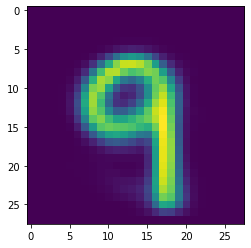

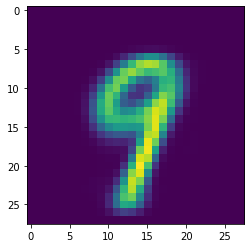

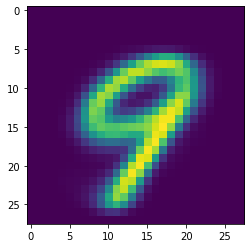

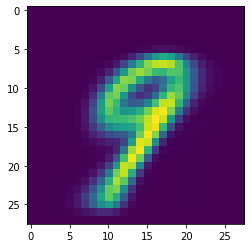

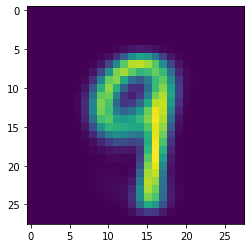

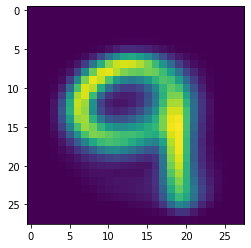

0.9236
0.9236
0.8412
0.9236
0.8498
0.8942
0.8492
0.8923
0.8333
0.8798
0.8231
0.8784
0.8056
0.8642
0.7946
0.8582
0.7774
0.8456
0.7702
0.8366
{'neighbors': 1, 'weights': 'uniform'}
--------------------------- 9 ---------------------------
(90, 784) (90,) [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 6. 6. 6. 6. 6. 6. 6. 6. 6. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 8. 8. 8. 8. 8. 8. 8. 8. 8. 9. 9. 9. 9. 9. 9. 9. 9. 9.]


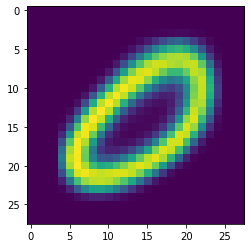

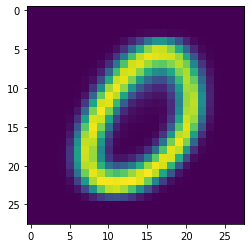

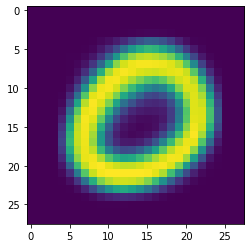

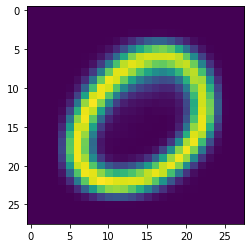

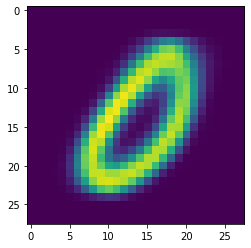

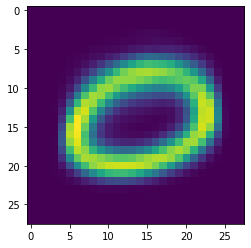

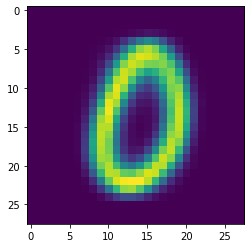

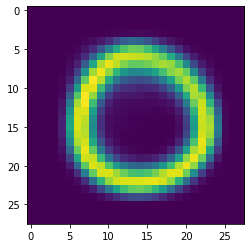

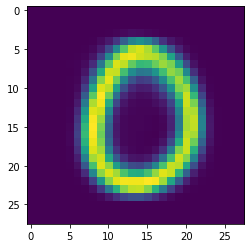

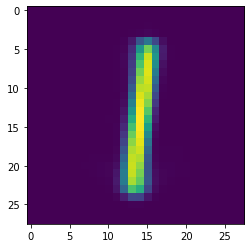

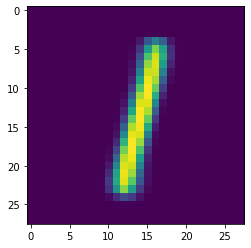

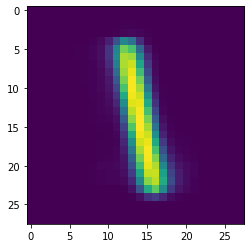

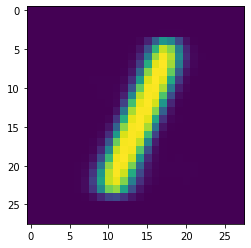

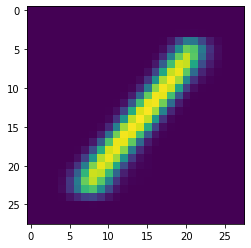

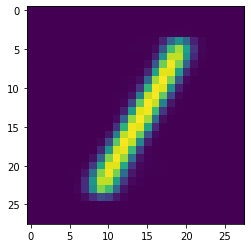

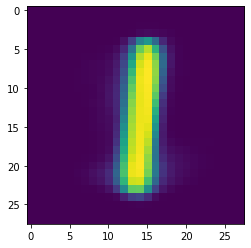

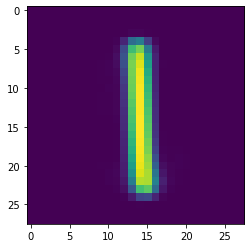

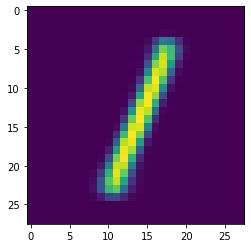

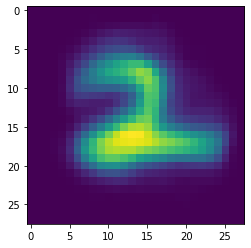

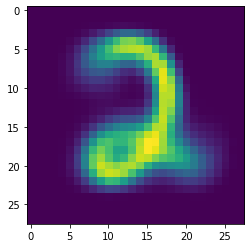

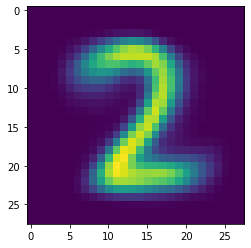

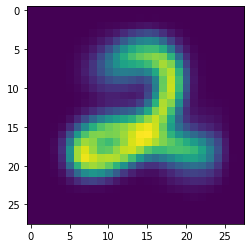

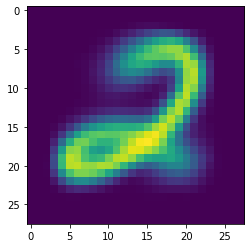

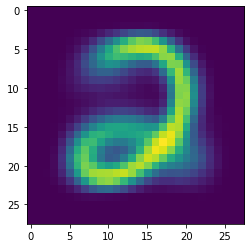

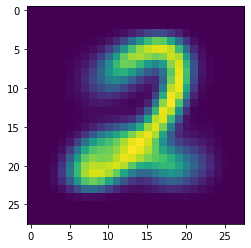

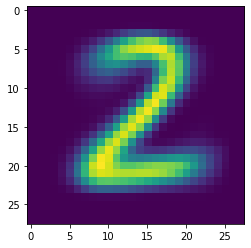

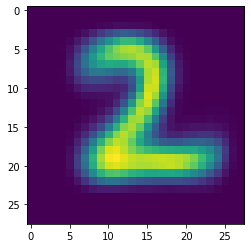

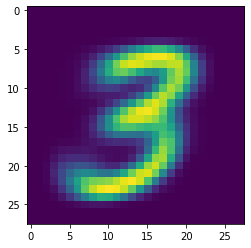

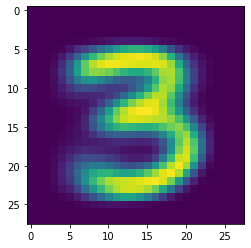

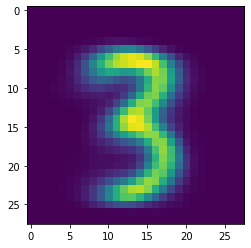

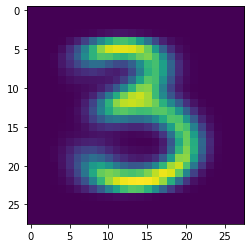

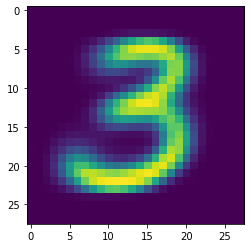

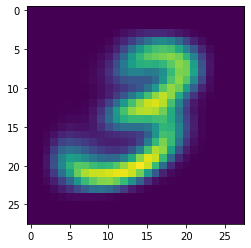

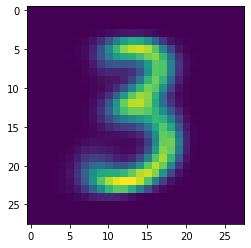

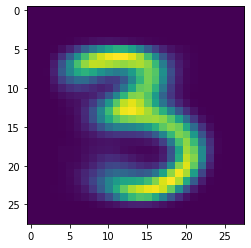

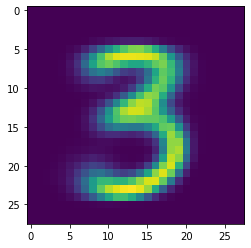

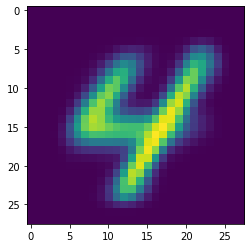

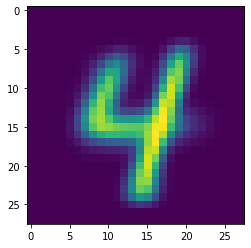

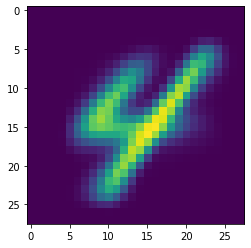

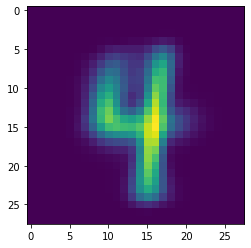

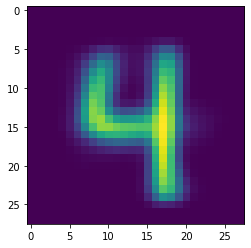

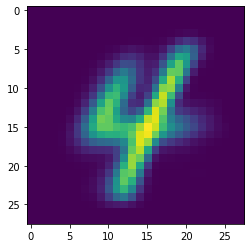

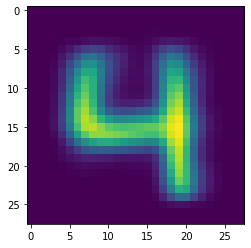

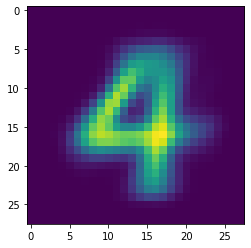

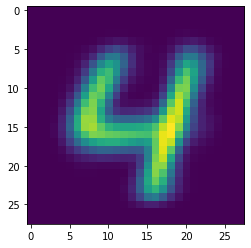

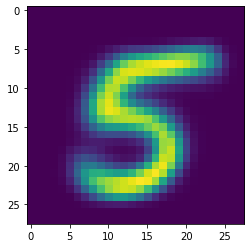

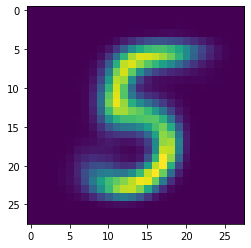

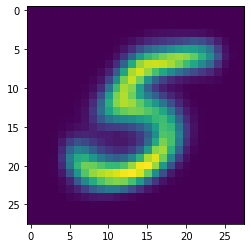

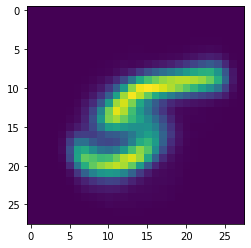

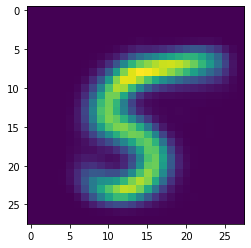

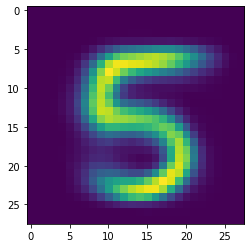

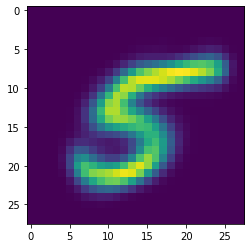

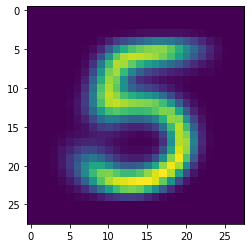

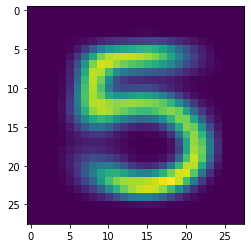

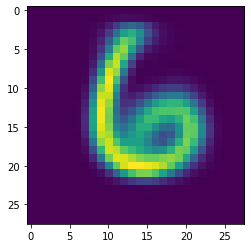

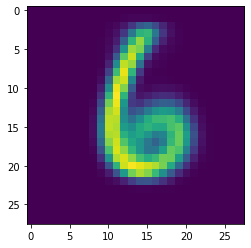

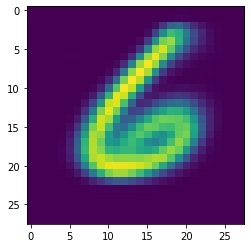

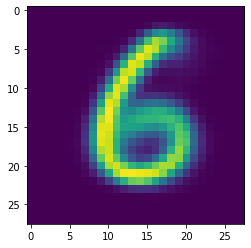

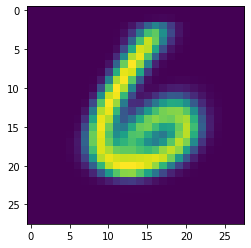

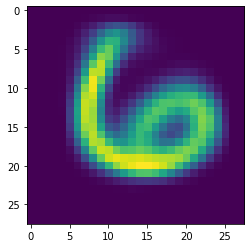

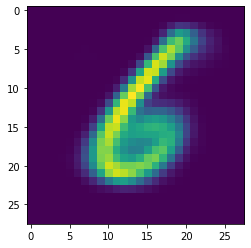

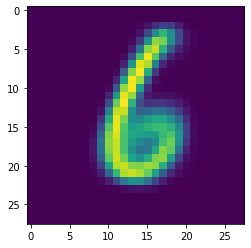

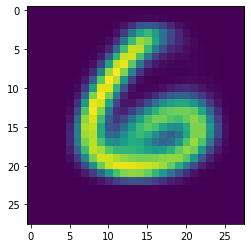

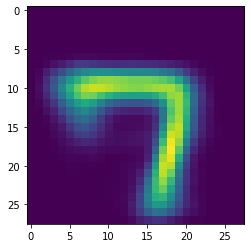

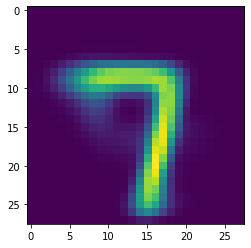

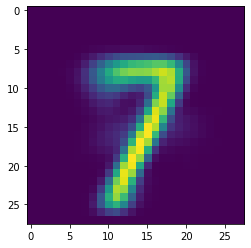

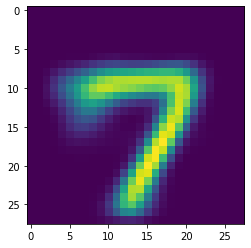

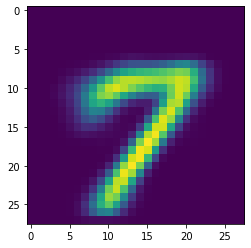

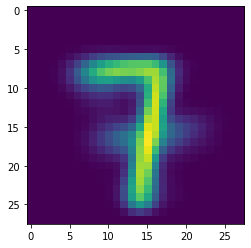

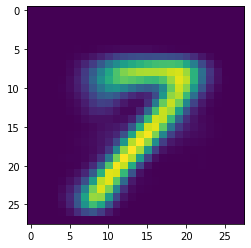

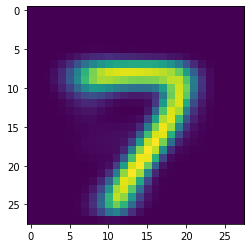

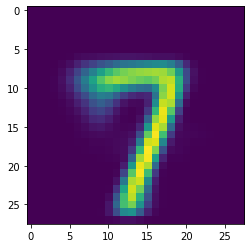

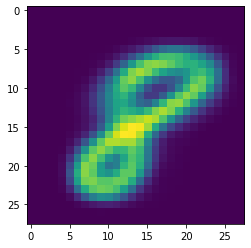

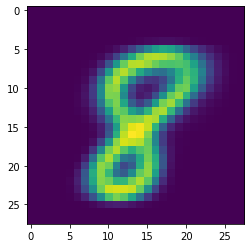

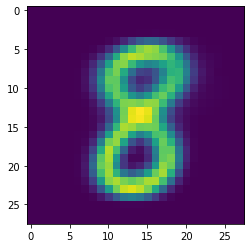

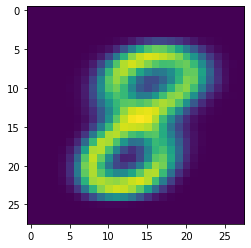

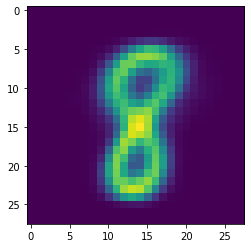

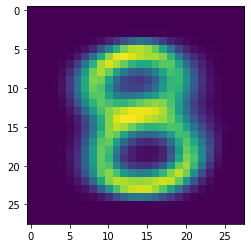

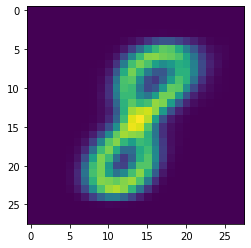

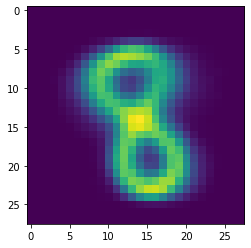

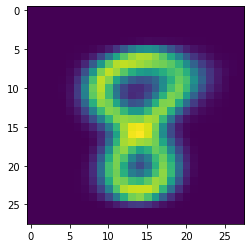

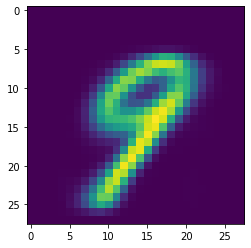

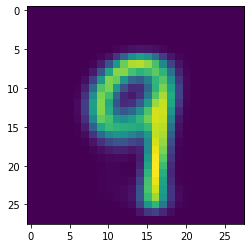

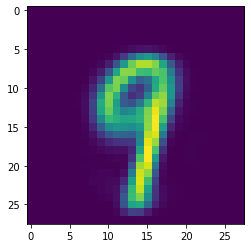

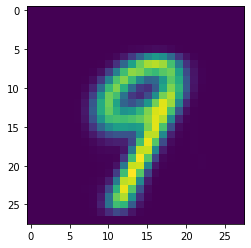

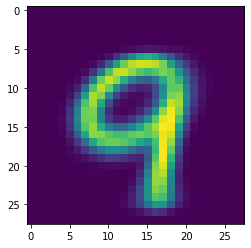

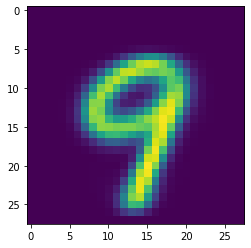

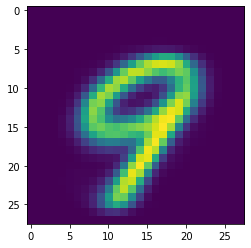

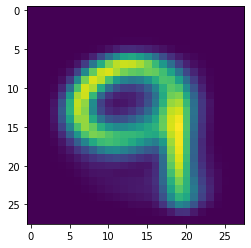

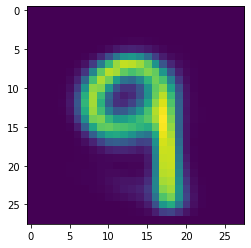

0.9279
0.9279
0.8489
0.9279
0.8615
0.9027
0.8594
0.9003
0.8427
0.8832
0.8323
0.8811
0.8153
0.8677
0.8035
0.8561
0.7907
0.8498
0.7811
0.8398
{'neighbors': 1, 'weights': 'uniform'}
--------------------------- 10 ---------------------------
(100, 784) (100,) [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 9. 9. 9. 9. 9. 9.
 9. 9. 9. 9.]


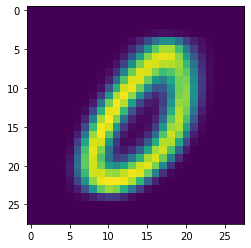

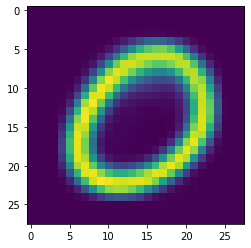

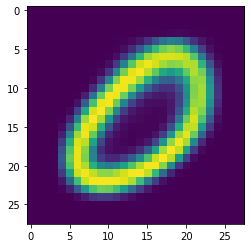

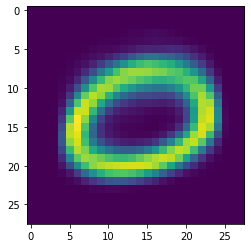

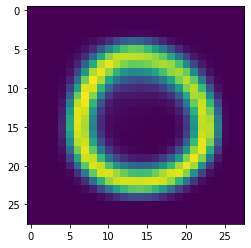

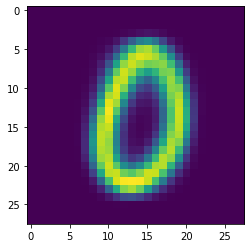

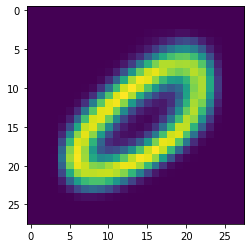

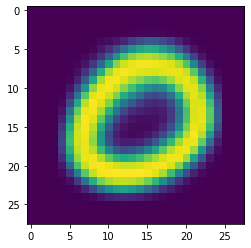

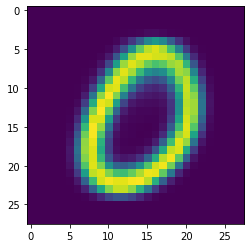

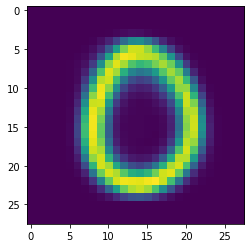

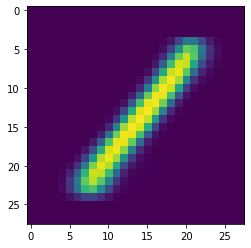

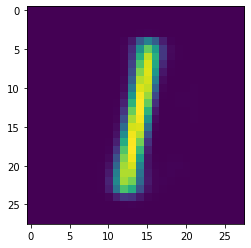

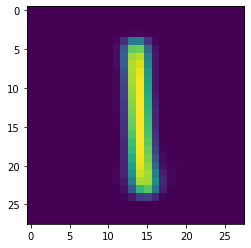

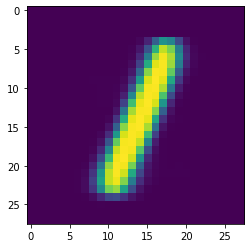

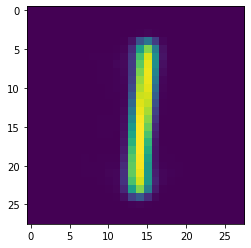

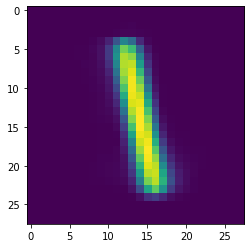

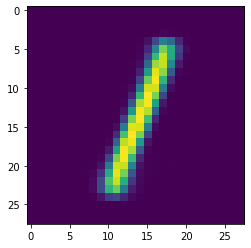

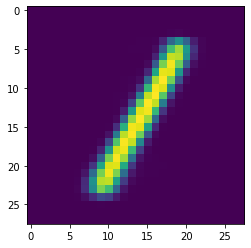

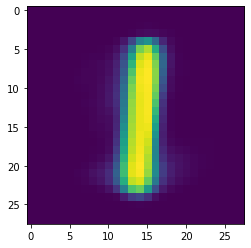

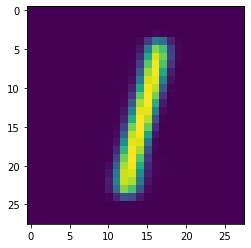

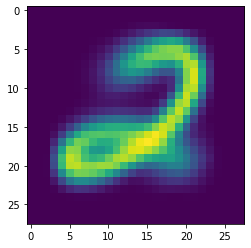

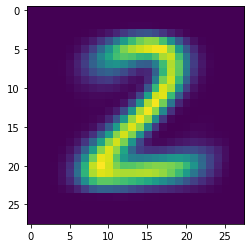

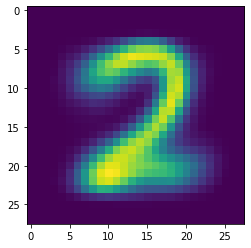

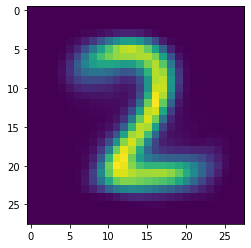

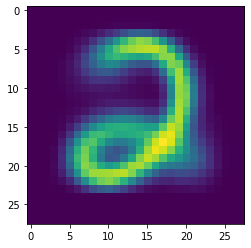

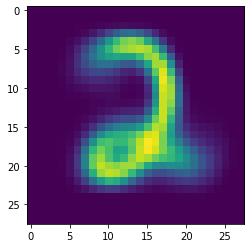

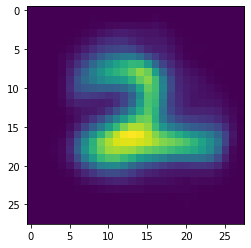

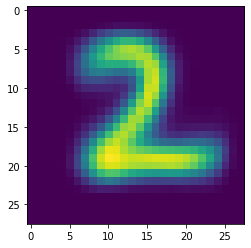

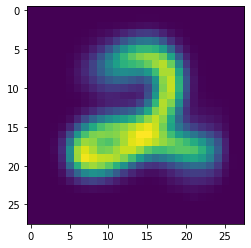

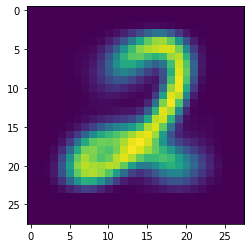

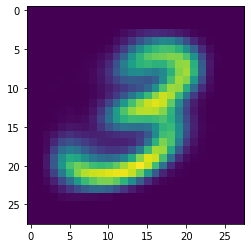

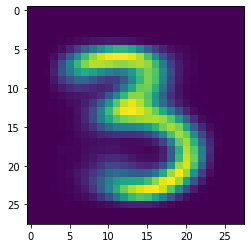

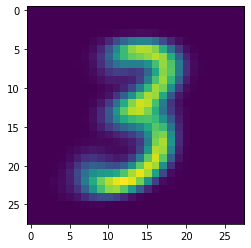

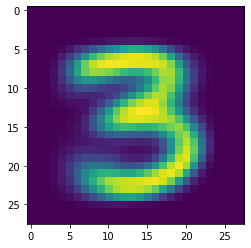

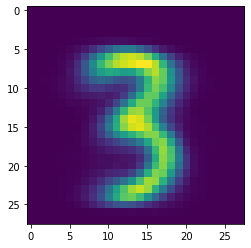

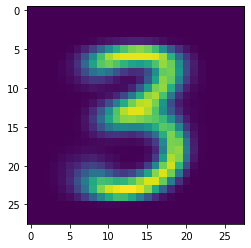

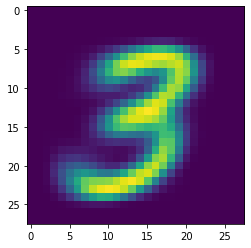

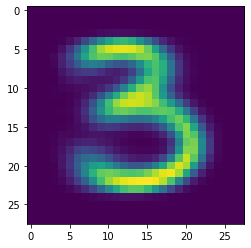

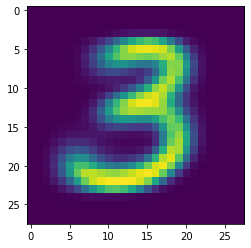

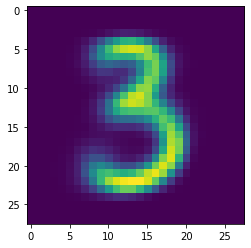

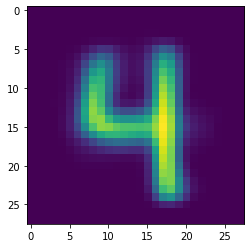

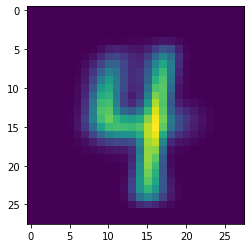

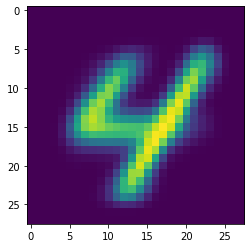

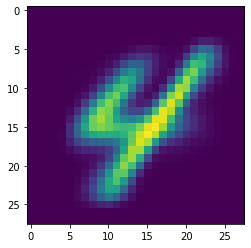

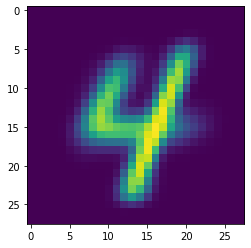

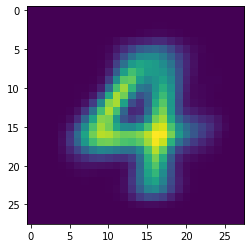

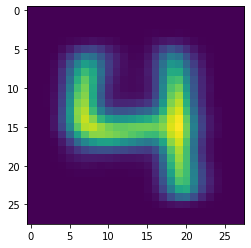

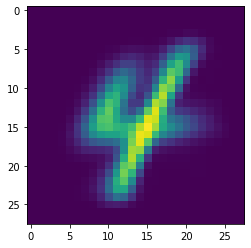

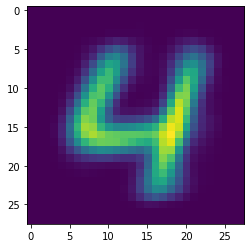

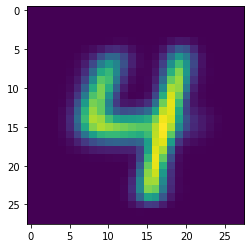

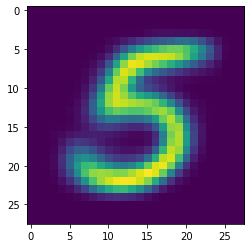

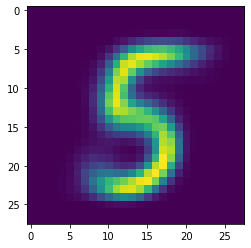

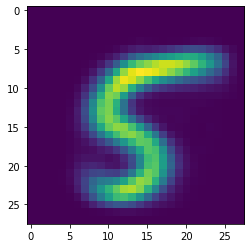

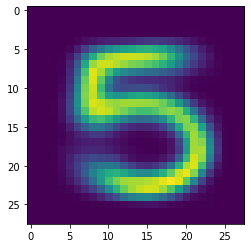

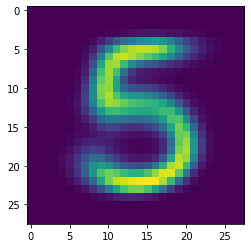

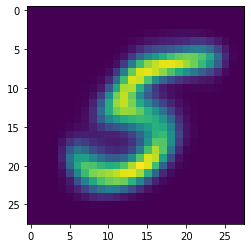

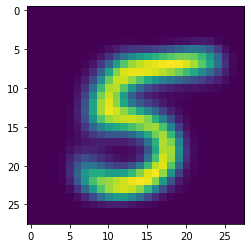

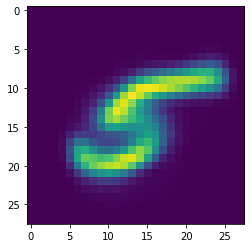

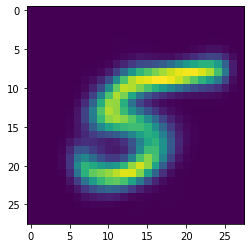

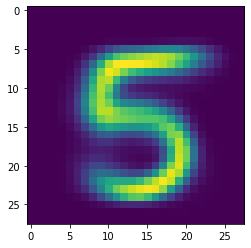

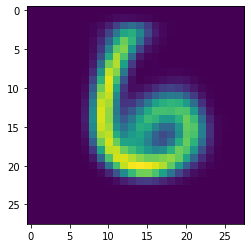

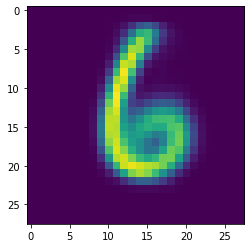

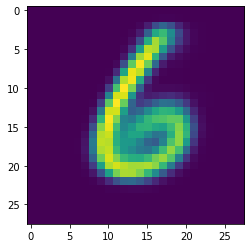

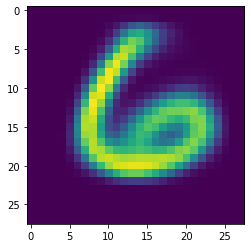

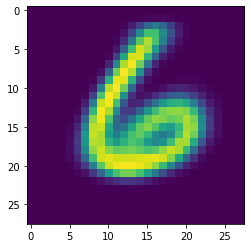

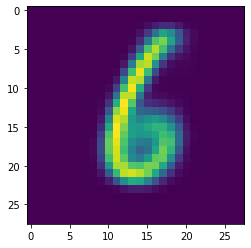

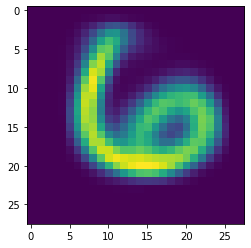

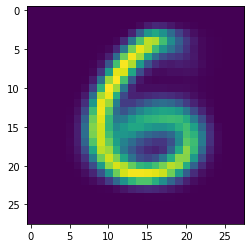

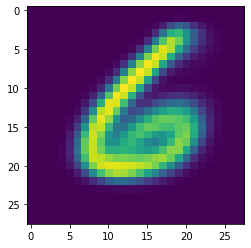

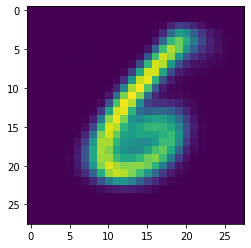

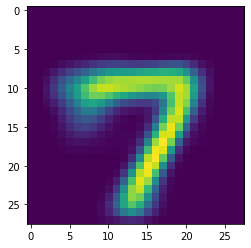

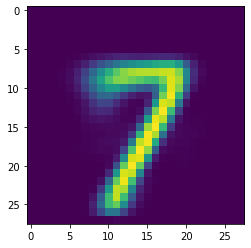

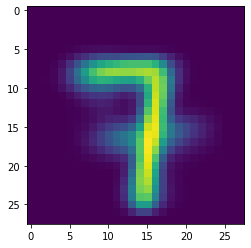

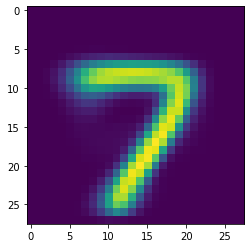

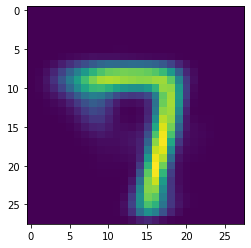

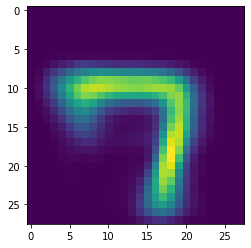

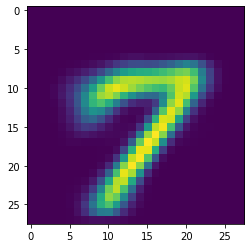

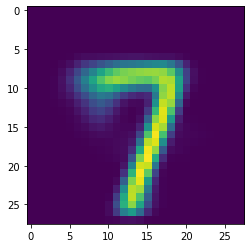

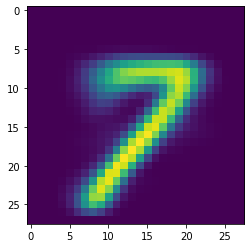

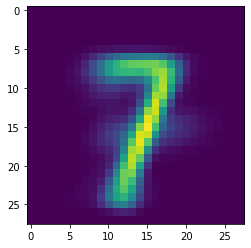

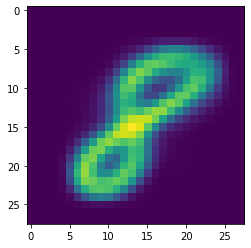

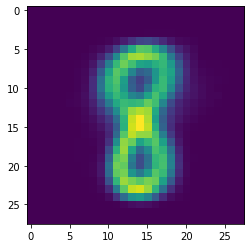

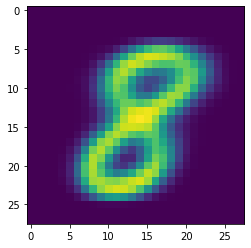

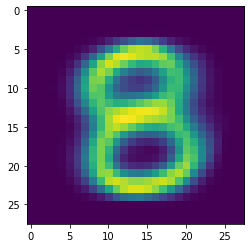

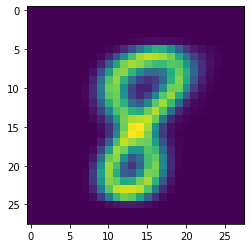

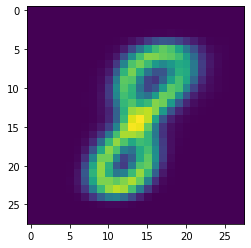

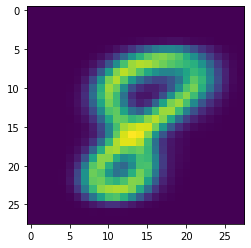

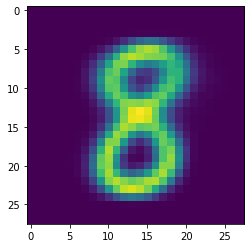

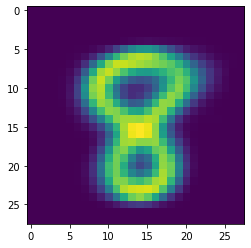

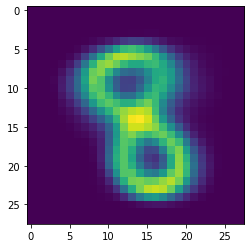

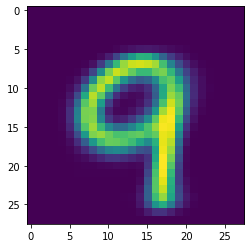

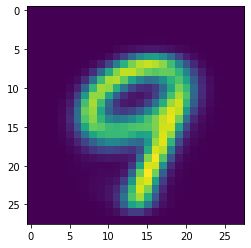

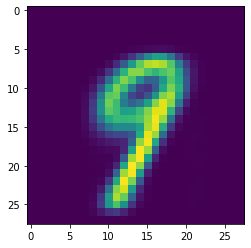

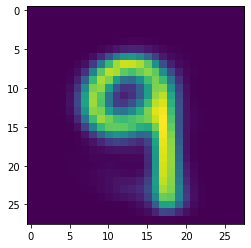

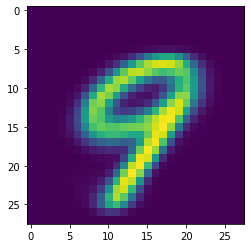

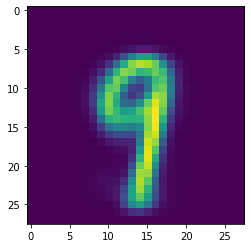

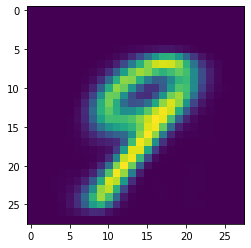

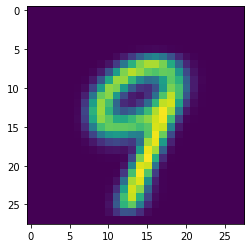

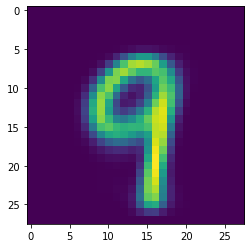

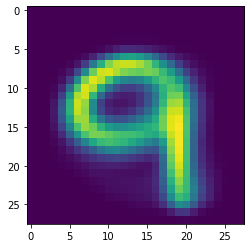

0.9274
0.9274
0.857
0.9274
0.8716
0.9043
0.8674
0.9043
0.8513
0.8908
0.8445
0.8891
0.8307
0.8796
0.82
0.8697
0.8132
0.8613
0.8027
0.8491
{'neighbors': 1, 'weights': 'uniform'}


In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

for N in range(2,11):
  print('---------------------------',N,'---------------------------')
  new_train_x = np.zeros([N*10,784])
  new_train_y = np.array([])
  Nclusters=N

  for ind_digit, arr_digit in enumerate(all_data):
    km = KMeans(n_clusters=Nclusters)
    km.fit(arr_digit)
    for i,el in enumerate(km.cluster_centers_): 
      new_train_x[i+ind_digit*N:i+ind_digit*N+1,:]=el
      new_train_y=np.append(new_train_y,ind_digit)
  
  print(new_train_x.shape, new_train_y.shape,new_train_y)
  for cluster in new_train_x:
    plt.imshow(cluster.reshape(28,28))
    plt.show()

  

  best_params = {'neighbors':0, 'weights':'none'}
  acc1=0

  k_range = range(1,11)
  weight_options = ["uniform", "distance"]
  for i in k_range:
    for j in weight_options:
      classifier = KNeighborsClassifier(n_neighbors=i,weights=j)
      classifier.fit(new_train_x, new_train_y)
      pred = classifier.predict(test_x_1)
      acc = accuracy_score(pred, test_y)
      print(acc)
      if acc > acc1:
        acc1 = acc
        best_params["neighbors"]=i
        best_params["weights"]=j

  print(best_params)